# HR Analytics Project

Problem Statement:
    
    Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

    HR Analytics

    Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

    Attrition in HR

    Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

    How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

    Attrition affecting Companies

    A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing the dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('HR Analytics Project.csv')

# Importing the required libraries

In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Getting the basic outlook over dataset

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [13]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [6]:
df.shape

(1470, 35)

In [18]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Observations:
    
    1.There are catagorical columns here, and it has to be label encoded and dictionary has to be created.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observations:
    
    1.There arent any null values
    2.There are two types of datatypes either object or int64

In [20]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [25]:
df1=df.dropna()

In [26]:
df.shape

(1470, 35)

In [27]:
df1.shape

(1470, 35)

In [28]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Observations:
    
    1.Univariate analysis has to be done to check different types of catagories in categorical columns.

In [29]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

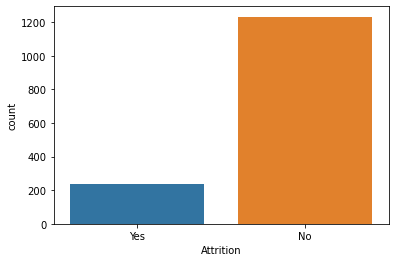

In [7]:
sns.countplot(df['Attrition'])

Observations:
    
    1.There is a class imbalance so along with accuracy we have to concentrate on f1 score even.

Basic outlook of the project:
    
    The whole project looks so challenging as dimensionality is quite high, Lots of information is there to extract.

# Univariate Analysis

In [8]:
def eda(col):
    print(col)
    print(df[col].describe())
    print('\n')
    plt.plot()
    sns.distplot(df[col])
    plt.show()
    print('\n')
    plt.plot()
    df[col].hist(grid=True)
    plt.show()
    print('\n')
    plt.plot()
    sns.boxplot(df[col])
    plt.show()

**Column 1: Age**

Age
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64




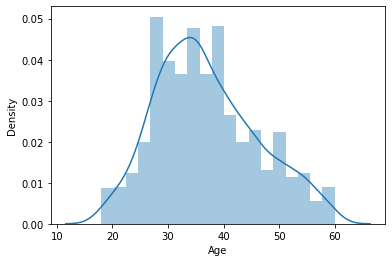

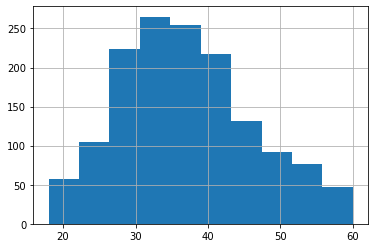

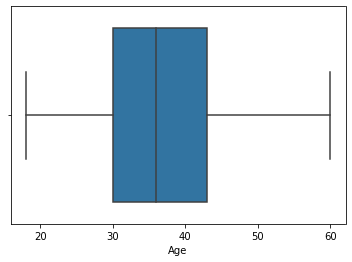

In [66]:
eda('Age')

Observations:
    
    1.We can see that the age varies from 18 to 60 and most of the employees are from 27 to 45.
    2.There is not much distortion in the dataset.
    3.In the boxplot we can see that the median is at the centre indicating that there is not much skewness.

**Column 2: Attrition**

In [9]:
#Lets replace the attrition categorical column
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
df['Attrition'].replace(['No','Yes'],[0,1],inplace=True)

In [11]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Attrition
count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64




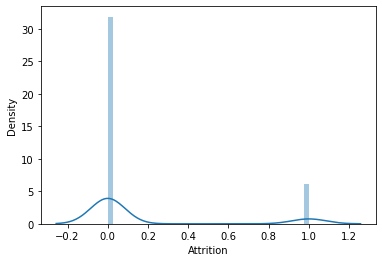

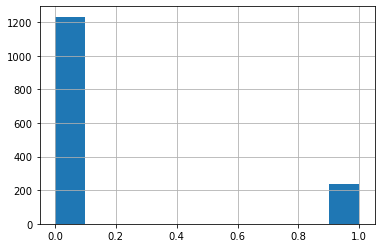

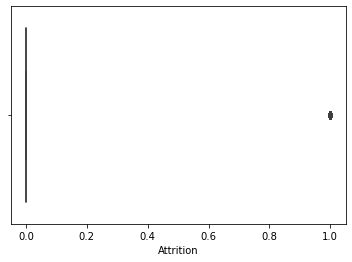

In [69]:
eda('Attrition')

Observations:
    
    1.We can see that there is a clear class imbalance.

**Column3.BusinessTravel**

In [12]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])

In [14]:
df['BusinessTravel'].value_counts()

2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

BusinessTravel
count    1470.000000
mean        1.607483
std         0.665455
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: BusinessTravel, dtype: float64




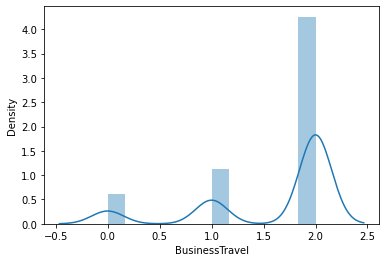

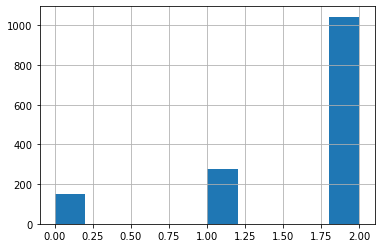

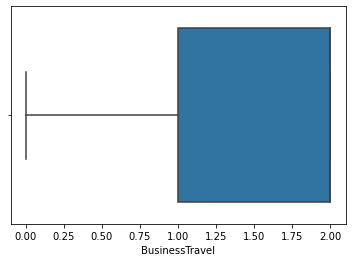

In [15]:
eda('BusinessTravel')

Observations:
    
    1.We can see that employees who travel rarely are more in number.

**Column 4:DailyRate**

DailyRate
count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64




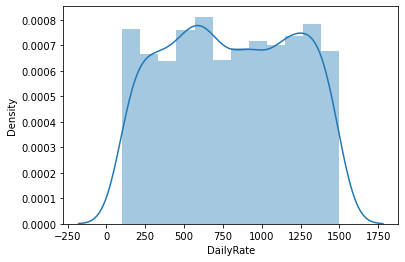

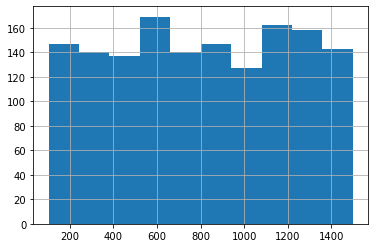

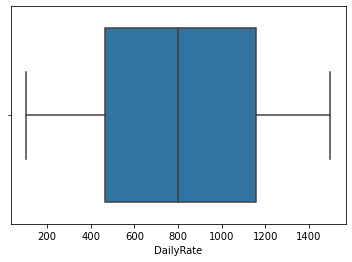

In [74]:
eda('DailyRate')

Observations:
    
    1.It ranges from 100 to 1500.
    2.There are no outliers.
    3.There is not much distortion in the graph.

**Column 5: Department**

In [16]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [17]:
#creating the dictionary to know which label represents what
le.fit(df['Department'])
label_Department=dict(zip(range(len(le.classes_)),le.classes_)) 

In [18]:
label_Department[2]

'Sales'

In [19]:
df['Department']=le.fit_transform(df['Department'])

Department
count    1470.000000
mean        1.260544
std         0.527792
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Department, dtype: float64




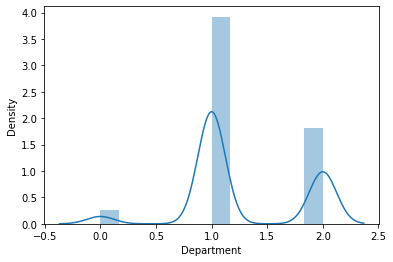

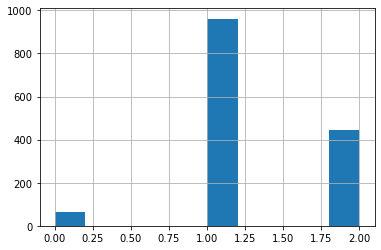

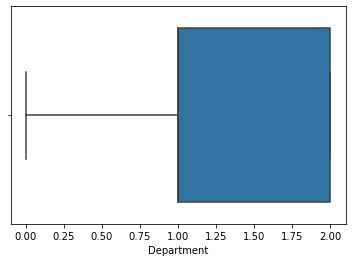

In [20]:
eda('Department')

In [21]:
print('we can see that the',label_Department[1],'department is more in number and',label_Department[0],'department is less in number')

we can see that the Research & Development department is more in number and Human Resources department is less in number


**Column 6: DistanceFromHome**

DistanceFromHome
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64




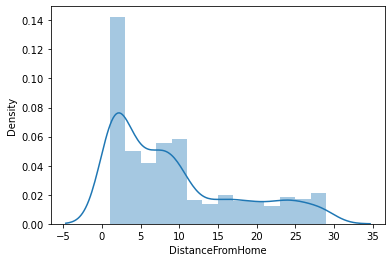

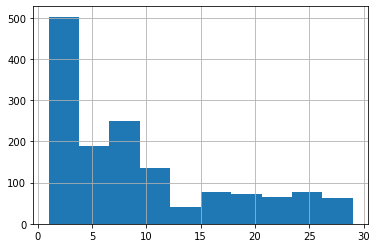

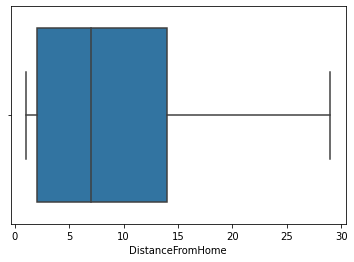

In [81]:
eda('DistanceFromHome')

Observations:
    
    1.The value 1 to 3 is very common.
    2.Most of the values lies within 10km

**Column 7: Education**

In [22]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

Education
count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64




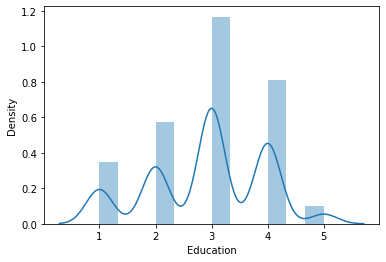

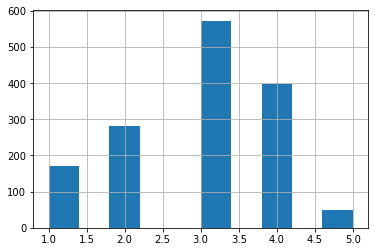

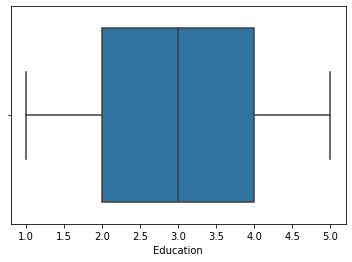

In [85]:
eda('Education')

Observations:
    
    1.Most of the employees belongs to 3rd and 4th category in the Education.

**Column 8: EducationField**

In [23]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [24]:
#creating the dictionary to know which label represents what
le.fit(df['EducationField'])
label_EducationField=dict(zip(range(len(le.classes_)),le.classes_)) 

In [25]:
label_EducationField[0]

'Human Resources'

In [26]:
df['EducationField']=le.fit_transform(df['EducationField'])

In [27]:
df['EducationField'].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

EducationField
count    1470.000000
mean        2.247619
std         1.331369
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: EducationField, dtype: float64




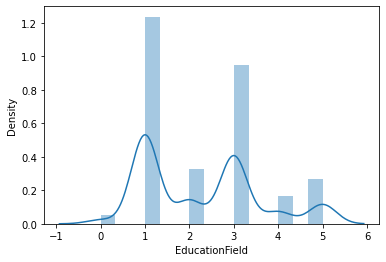

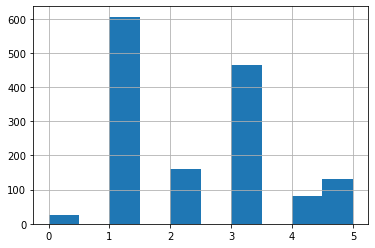

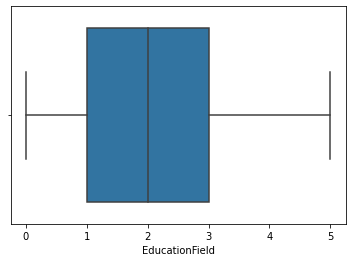

In [91]:
eda('EducationField')

In [28]:
label_EducationField[1]

'Life Sciences'

In [29]:
label_EducationField[3]

'Medical'

Observations:
    
    1.We can see that Life Sciences and Medical are highest in  number.

**Column 9: EmployeeCount**

In [30]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [31]:
df['EmployeeCount'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: EmployeeCount, dtype: int64

Observations:
    
    1.Since all the columns has same value we can drop this column.

**Column 10: EmployeeNumber**

In [96]:
df['EmployeeNumber'].value_counts()

2046    1
641     1
644     1
645     1
647     1
648     1
649     1
650     1
652     1
653     1
655     1
656     1
657     1
659     1
661     1
662     1
663     1
664     1
665     1
666     1
667     1
643     1
639     1
671     1
638     1
611     1
612     1
613     1
614     1
615     1
616     1
618     1
620     1
621     1
622     1
623     1
624     1
625     1
626     1
630     1
631     1
632     1
634     1
635     1
669     1
675     1
606     1
714     1
716     1
717     1
2060    1
720     1
721     1
722     1
723     1
724     1
725     1
727     1
728     1
729     1
730     1
731     1
732     1
733     1
734     1
738     1
741     1
715     1
712     1
677     1
710     1
679     1
680     1
682     1
683     1
684     1
686     1
689     1
690     1
691     1
692     1
698     1
699     1
700     1
701     1
702     1
704     1
705     1
707     1
709     1
608     1
605     1
743     1
511     1
514     1
515     1
516     1
517     1
518     1
520     1


In [97]:
df['EmployeeNumber'].head(50)

0      1
1      2
2      4
3      5
4      7
5      8
6     10
7     11
8     12
9     13
10    14
11    15
12    16
13    18
14    19
15    20
16    21
17    22
18    23
19    24
20    26
21    27
22    28
23    30
24    31
25    32
26    33
27    35
28    36
29    38
30    39
31    40
32    41
33    42
34    45
35    46
36    47
37    49
38    51
39    52
40    53
41    54
42    55
43    56
44    57
45    58
46    60
47    61
48    62
49    63
Name: EmployeeNumber, dtype: int64

In [98]:
df['EmployeeNumber'].tail(50)

1420    1999
1421    2000
1422    2003
1423    2007
1424    2008
1425    2009
1426    2010
1427    2012
1428    2013
1429    2014
1430    2015
1431    2016
1432    2017
1433    2018
1434    2019
1435    2020
1436    2021
1437    2022
1438    2023
1439    2024
1440    2025
1441    2026
1442    2027
1443    2031
1444    2032
1445    2034
1446    2035
1447    2036
1448    2037
1449    2038
1450    2040
1451    2041
1452    2044
1453    2045
1454    2046
1455    2048
1456    2049
1457    2051
1458    2052
1459    2053
1460    2054
1461    2055
1462    2056
1463    2057
1464    2060
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, dtype: int64

EmployeeNumber
count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64




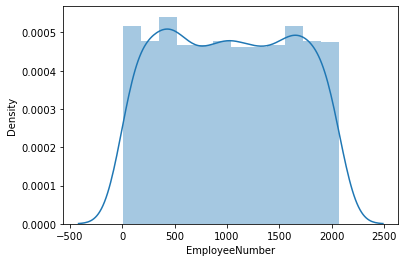

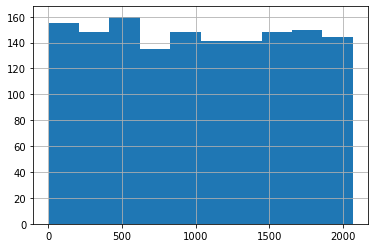

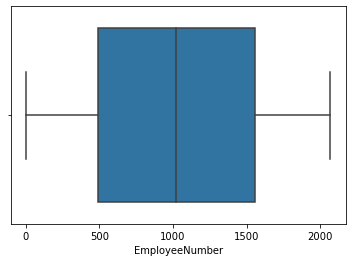

In [32]:
eda('EmployeeNumber')

Observations:
    
    1.We can see that there is no usefullness from this column so we can remove this.

**Column 11: EnvironmentSatisfaction**

In [33]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

EnvironmentSatisfaction
count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64




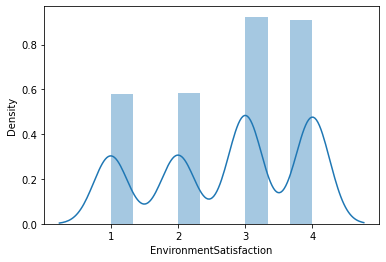

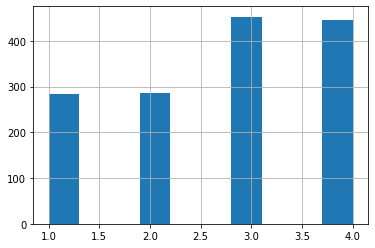

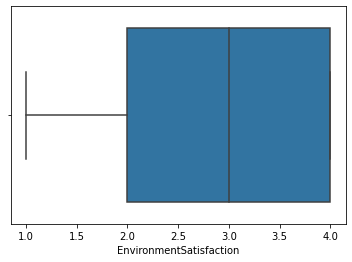

In [102]:
eda('EnvironmentSatisfaction')

Observations:
    
    1.In environment satisifaction column we can see the category 3 and 4 are in same number and they are they the choice of 60% employees and category 1 and 2 are in same number and they are thr choice of the remaining 40%.

**Column 12: Gender**

In [34]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [35]:
#creating the dictionary to know which label represents what
le.fit(df['Gender'])
label_Gender=dict(zip(range(len(le.classes_)),le.classes_)) 

In [36]:
df['Gender']=le.fit_transform(df['Gender'])

In [37]:
df['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [38]:
label_Gender[0]

'Female'

Gender
count    1470.000000
mean        0.600000
std         0.490065
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64




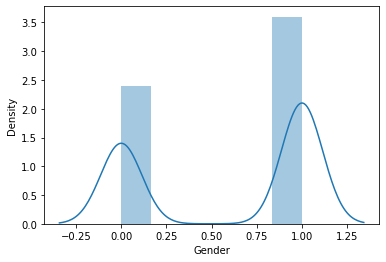

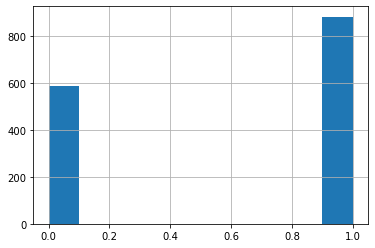

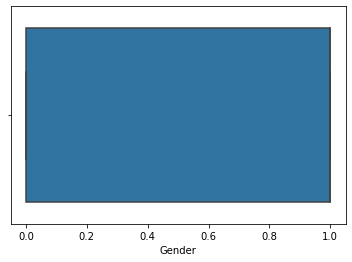

In [39]:
eda('Gender')

Observations:
    
    1.We can see that mens are more in number than woman.

**Column 13: HourlyRate**

In [41]:
df['HourlyRate'].value_counts()

66     29
42     28
98     28
48     28
84     28
79     27
96     27
57     27
52     26
87     26
56     26
54     26
92     25
46     25
72     25
32     24
43     24
45     24
73     24
78     23
60     23
82     23
95     23
62     23
81     22
83     22
94     22
51     22
86     22
80     21
77     21
59     21
88     21
41     21
97     21
74     20
75     20
99     20
61     20
33     19
100    19
65     19
30     19
64     19
67     19
90     19
76     19
71     18
91     18
35     18
36     18
37     18
40     18
85     18
44     18
49     18
39     17
58     17
47     16
63     16
70     16
50     16
55     16
93     16
89     15
69     15
31     15
68     14
53     14
38     13
34     12
Name: HourlyRate, dtype: int64

HourlyRate
count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64




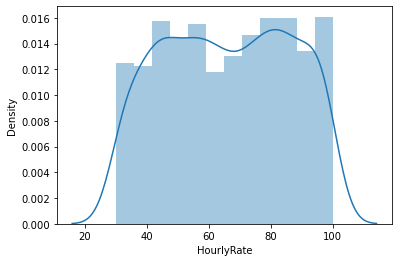

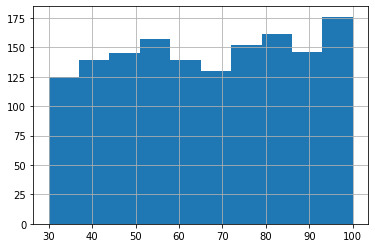

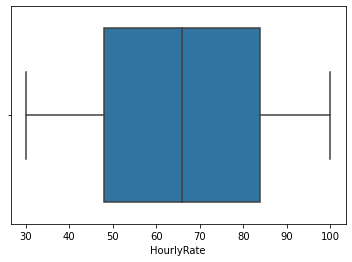

In [42]:
eda('HourlyRate')

Observations:
    
    1.The data ranges from 30 to 100 and data is precise.

**Column 14:JobInvolvement**

In [43]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

JobInvolvement
count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64




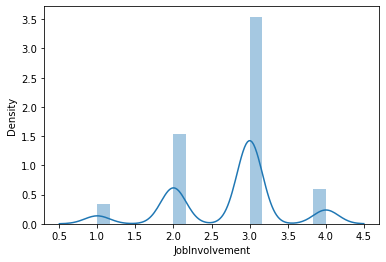

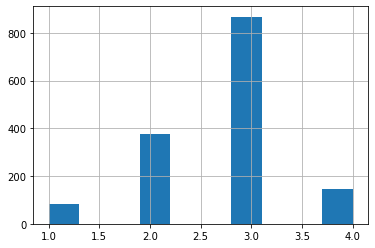

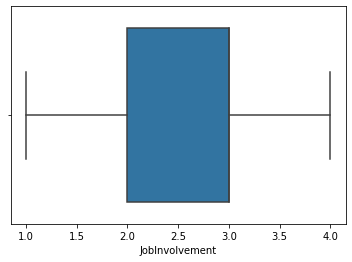

In [45]:
eda('JobInvolvement')

Observations:
    
    1.From the graph we can see that most of job satisifaction category is 3 and next is 2.

**Column 15: JobLevel**

In [46]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

JobLevel
count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64




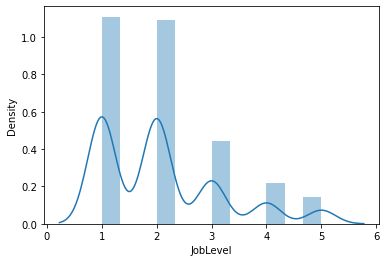

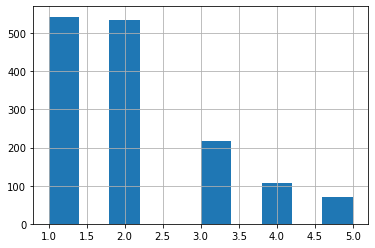

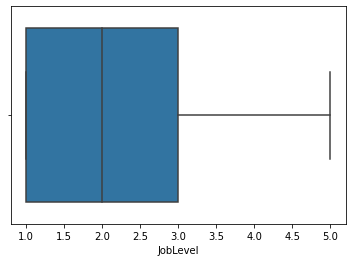

In [48]:
eda('JobLevel')

Observations:
    
    1.We can see that as the joblevel increases the employee count decreases.

**Column 16: JobSatisfaction** 

In [50]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

JobSatisfaction
count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64




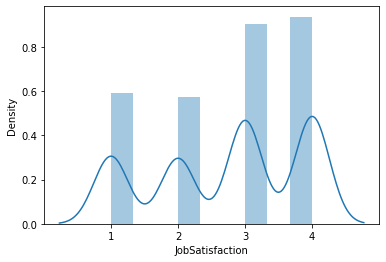

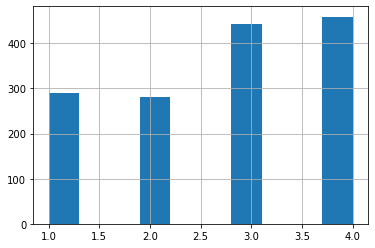

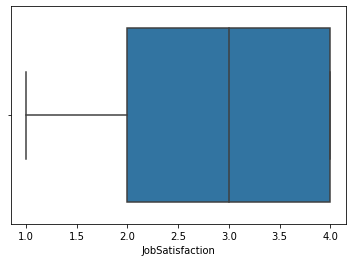

In [52]:
eda('JobSatisfaction')

Observations:
    
    1.We can see that category 1 and 2 are almost same in number.same the case with 3 and 4 also.

**Column 17: JobRole**

In [54]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [56]:
#creating the dictionary to know which label represents what
le.fit(df['JobRole'])
label_JobRole=dict(zip(range(len(le.classes_)),le.classes_)) 

In [57]:
df['JobRole']=le.fit_transform(df['JobRole'])

In [58]:
df['JobRole'].value_counts()

7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64

In [59]:
label_JobRole[7]

'Sales Executive'

JobRole
count    1470.000000
mean        4.458503
std         2.461821
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         8.000000
Name: JobRole, dtype: float64




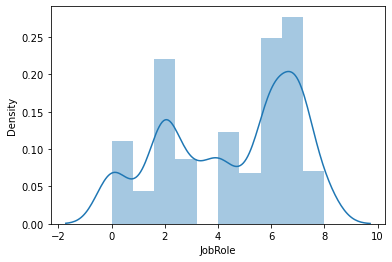

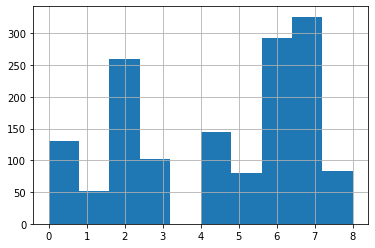

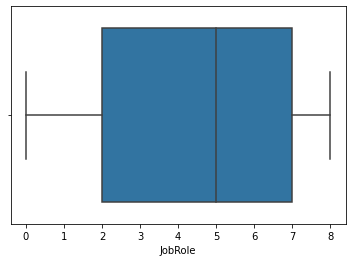

In [60]:
eda('JobRole')

In [61]:
label_JobRole[7]

'Sales Executive'

In [62]:
label_JobRole[6]

'Research Scientist'

In [63]:
label_JobRole[2]

'Laboratory Technician'

Observations:
    
    1.Most of the employees belongs to Sales Executive and Research Scientist category, and then Laboratory Technician.

**Column 18: MaritalStatus**

In [64]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [65]:
#creating the dictionary to know which label represents what
le.fit(df['MaritalStatus'])
label_MaritalStatus=dict(zip(range(len(le.classes_)),le.classes_)) 

In [66]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [67]:
df['MaritalStatus'].head()

0    2
1    1
2    2
3    1
4    1
Name: MaritalStatus, dtype: int32

In [68]:
label_MaritalStatus[2]

'Single'

In [69]:
label_MaritalStatus[1]

'Married'

In [70]:
label_MaritalStatus[0]

'Divorced'

MaritalStatus
count    1470.000000
mean        1.097279
std         0.730121
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: MaritalStatus, dtype: float64




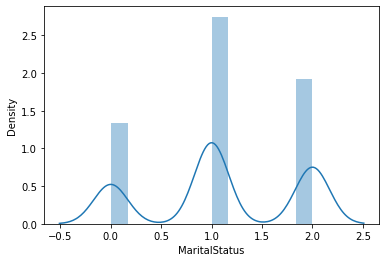

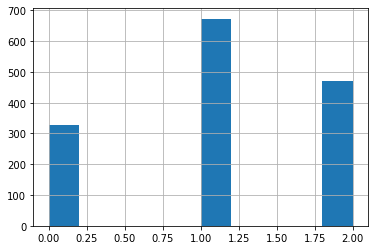

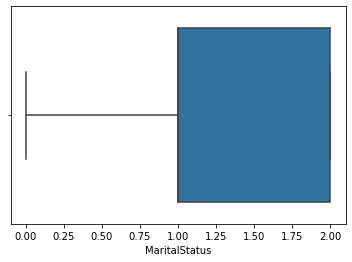

In [74]:
eda('MaritalStatus')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

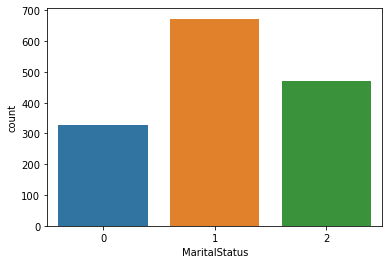

In [77]:
sns.countplot(df['MaritalStatus'])

In [78]:
label_MaritalStatus[0]

'Divorced'

In [79]:
label_MaritalStatus[1]

'Married'

In [80]:
label_MaritalStatus[2]

'Single'

Observations:
    
    1.We can see that category 1 is more in number which is married followed by singles and Divorced, and the thing is that Divorced category is in significant number.

**Column 19: MonthlyIncome**

In [81]:
df['MonthlyIncome'].value_counts()

2342     4
5562     3
2741     3
2451     3
2610     3
2380     3
6142     3
6347     3
2559     3
2404     3
3452     3
5769     2
3420     2
6397     2
4306     2
2743     2
3760     2
2720     2
4779     2
4284     2
5238     2
5228     2
2269     2
2996     2
9980     2
2782     2
5204     2
5993     2
4197     2
7756     2
3904     2
3072     2
4898     2
2177     2
5304     2
5346     2
2187     2
4876     2
2973     2
5467     2
5003     2
6811     2
2323     2
9824     2
6804     2
2450     2
2515     2
2439     2
5484     2
2500     2
5473     2
2564     2
3162     2
5561     2
4968     2
3407     2
17861    2
2587     2
4639     2
5605     2
5410     2
2703     2
2436     2
5405     2
10609    2
2406     2
6500     2
4440     2
2657     2
2109     2
4724     2
2367     2
2362     2
3294     2
2693     2
2340     2
10096    2
2293     2
2073     2
2377     2
2033     2
2372     2
6272     2
3038     2
2028     2
6162     2
2070     2
4941     2
2942     2
2936     2
5343     2

MonthlyIncome
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64




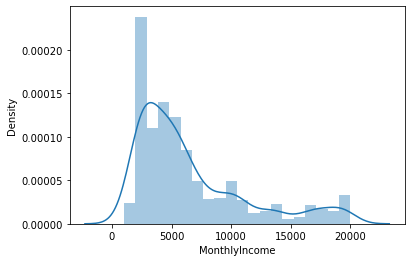

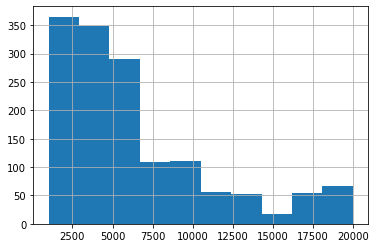

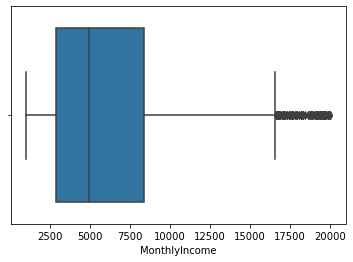

In [82]:
eda('MonthlyIncome')

Observations:
    
    1.Most of the employees are getting under 10k.
    2.There are outliers.

**Column 20: MonthlyRate**

In [83]:
df['MonthlyRate'].value_counts()

4223     3
9150     3
6670     2
7324     2
4658     2
21534    2
16154    2
13008    2
12355    2
6069     2
2125     2
19373    2
2755     2
9129     2
20284    2
11162    2
3339     2
7744     2
11652    2
20364    2
24444    2
17001    2
9096     2
22102    2
10494    2
22074    2
12858    2
9558     2
15986    2
15891    2
11737    2
6319     2
4156     2
8952     2
11591    2
15318    2
25326    2
21981    2
6881     2
23016    2
5355     2
10901    1
17369    1
4050     1
25258    1
23213    1
4235     1
13035    1
15000    1
22477    1
6889     1
12947    1
17071    1
5041     1
19121    1
11092    1
10919    1
23281    1
8870     1
2725     1
19106    1
19124    1
6896     1
4759     1
2721     1
17056    1
8863     1
10910    1
17053    1
19100    1
21146    1
4761     1
25518    1
23258    1
8935     1
19146    1
21196    1
15053    1
17102    1
21199    1
17119    1
6865     1
21203    1
8916     1
13022    1
4821     1
16998    1
15062    1
18686    1
15417    1
15067    1

MonthlyRate
count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64




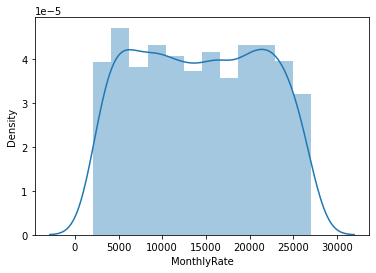

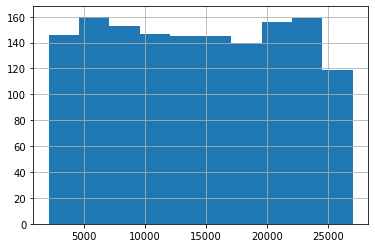

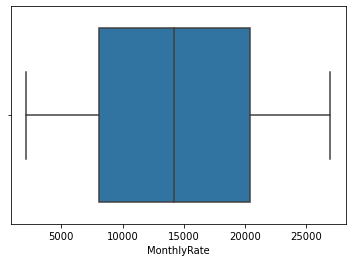

In [84]:
eda('MonthlyRate')

Observations:
    
    1.The data is uniformly distributed.

**Column 21: NumCompaniesWorked**

In [85]:
df['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

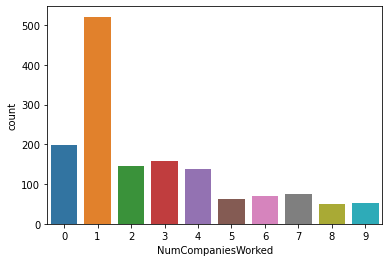

In [86]:
sns.countplot(df['NumCompaniesWorked'])

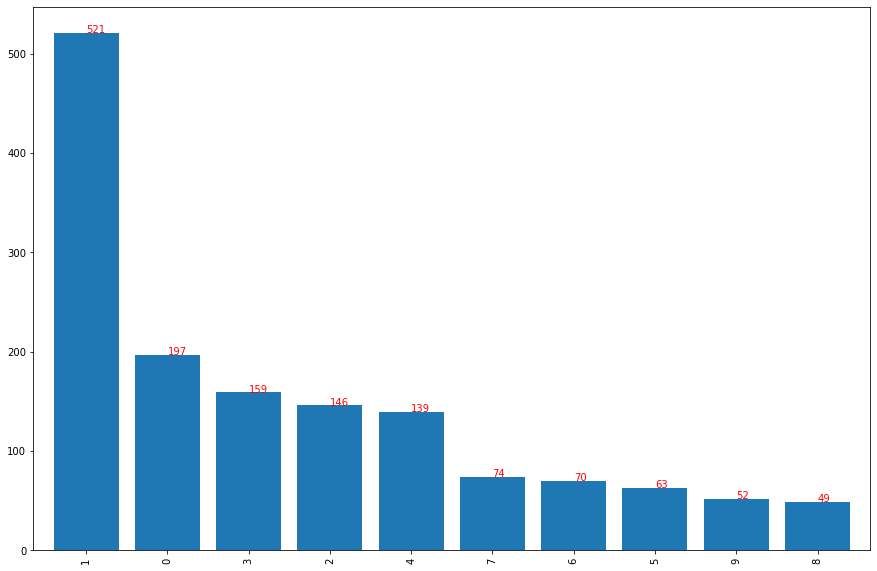

In [87]:
plt.figure(figsize=(15,10))
s = df['NumCompaniesWorked'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.NumCompaniesWorked + 0.2 , v.NumCompaniesWorked, color='red')
plt.show()

Observations:
    
    1.we can see that out of 1470, 521 people have an experince of working in an company, after that there are 197 are working on the same company from the starting ans so on.

**Column 22: Over18**

In [89]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

Observations:
    
    1.All are over 18 so we can drop this column.

**Column 23: OverTime**

In [90]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [91]:
df['OverTime']=df['OverTime'].replace(['No','Yes'],[0,1])

<AxesSubplot:xlabel='OverTime', ylabel='count'>

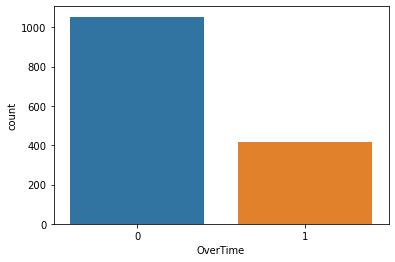

In [92]:
sns.countplot(df['OverTime'])

In [93]:
1054/1470

0.7170068027210884

Observations:
    
    1.Out of all the employees only 30% are overtime employees.

**Column 24: PercentSalaryHike**

In [94]:
df['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

PercentSalaryHike
count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64




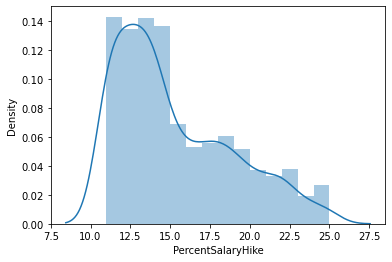

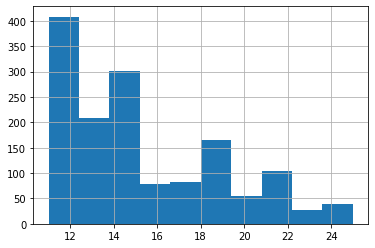

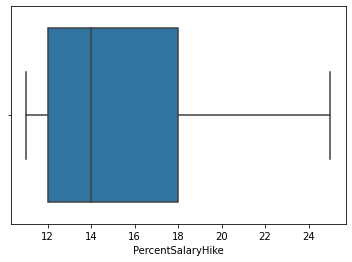

In [95]:
eda('PercentSalaryHike')

Observations:
    
    1.We can see that on an average there is 15% hike in the salary.
    2.There are no outliers.
    3.There is skewness.

**Column 25: PerformanceRating**

In [96]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

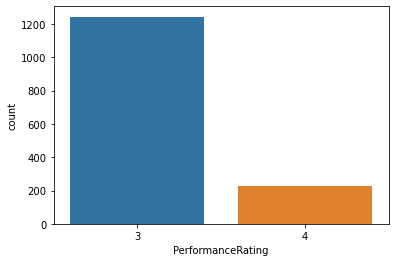

In [97]:
sns.countplot(df['PerformanceRating'])

Observations:
    
    1.If we see that 85% of the people have 3 performance rating.

**Column 26: RelationshipSatisfaction**

In [99]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

RelationshipSatisfaction
count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64




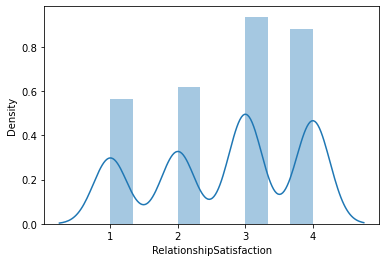

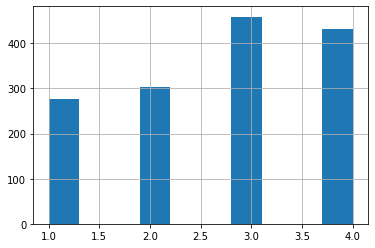

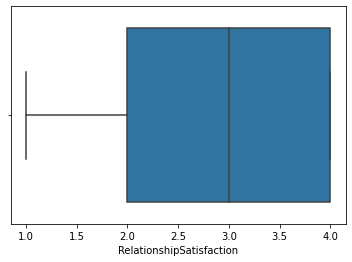

In [100]:
eda('RelationshipSatisfaction')

Observations:
    
    1.Category 3 and 4 has more values compared to category 1 and 2.

**Column 27: StandardHours**

In [102]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

Observations:
    
    1.We can drop this value since all are same values.

**Column 28: StockOptionLevel**

In [104]:
df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

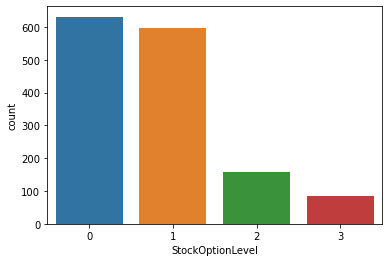

In [105]:
sns.countplot(df['StockOptionLevel'])

Observations:
    
    1.There are more 0 abd 1 StockoptionLevel than 2 and 3.

**Column 29: TotalWorkingYears**

In [106]:
df['TotalWorkingYears'].value_counts()

10    202
6     125
8     103
9      96
5      88
1      81
7      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '40')]

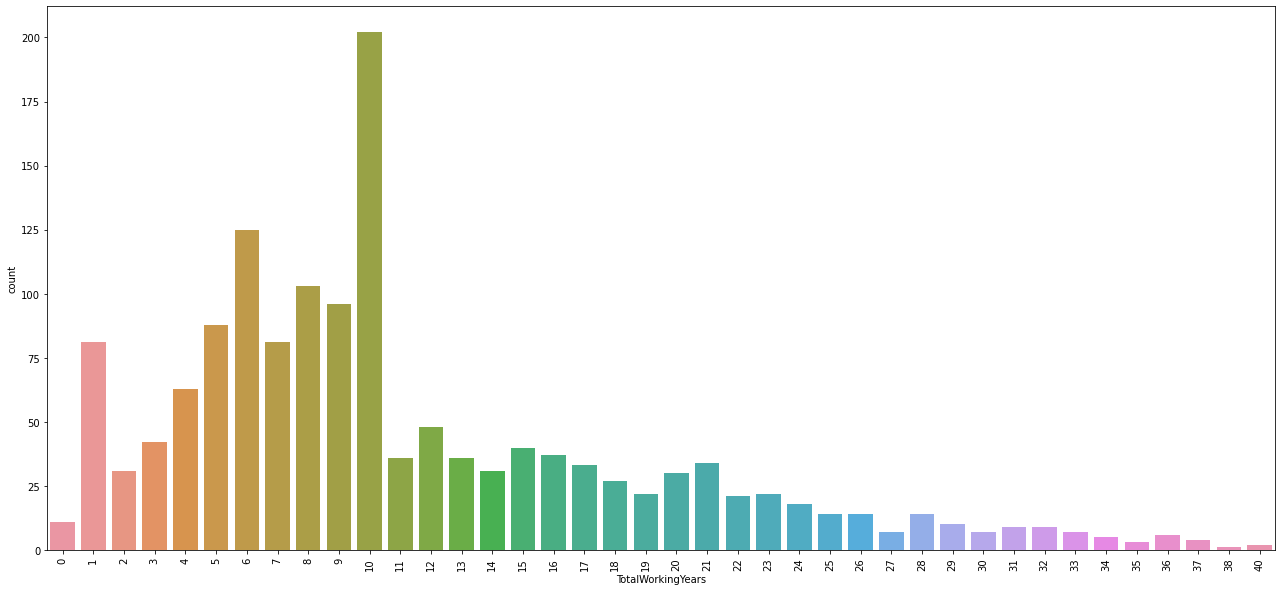

In [108]:
plt.figure(figsize=(22,10))
count1=sns.countplot(df['TotalWorkingYears'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)

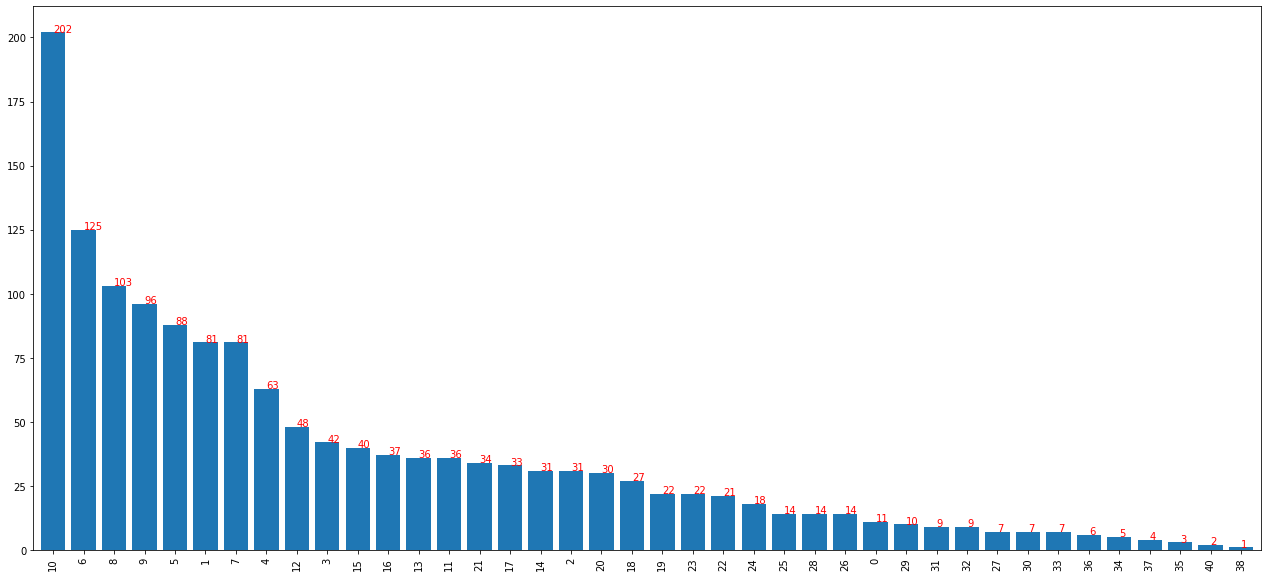

In [109]:
plt.figure(figsize=(22,10))
s = df['TotalWorkingYears'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.TotalWorkingYears + 0.2 , v.TotalWorkingYears, color='red')
plt.show()

Observations:
    
    1.From the graph we can see that there are 202 employees who has got more than 10 years of experience, and then 125 employees with 6 years of experience so on.

**Column 30: TrainingTimesLastYear**

In [110]:
df['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

TrainingTimesLastYear
count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64




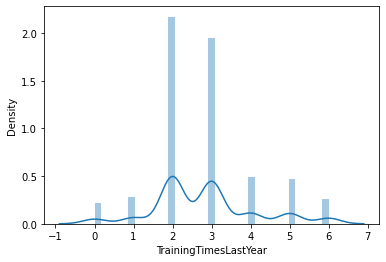

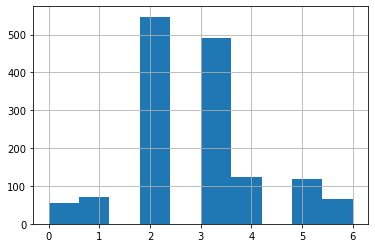

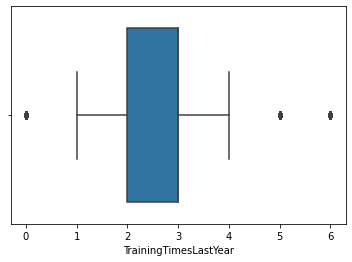

In [111]:
eda('TrainingTimesLastYear')

Observations:
    
    1.We can see that around 550 memebers had twice and around 500 members had thrice training last year,There are employees who had one to six times also.

**Column 31: WorkLifeBalance**

In [112]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

WorkLifeBalance
count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64




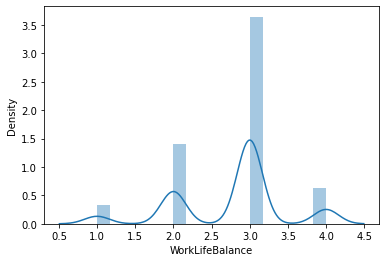

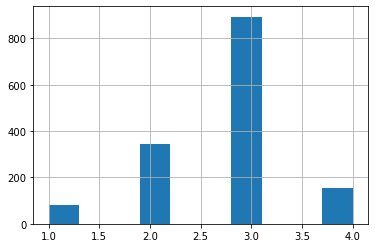

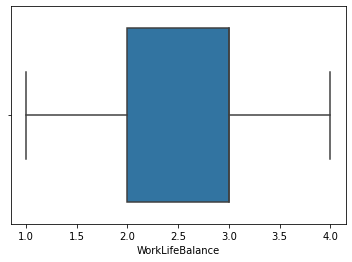

In [113]:
eda('WorkLifeBalance')

Observations:
    
    1.Most of the people have an work life balance as 3

**Column 32: YearsAtCompany**

In [114]:
df['YearsAtCompany'].value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

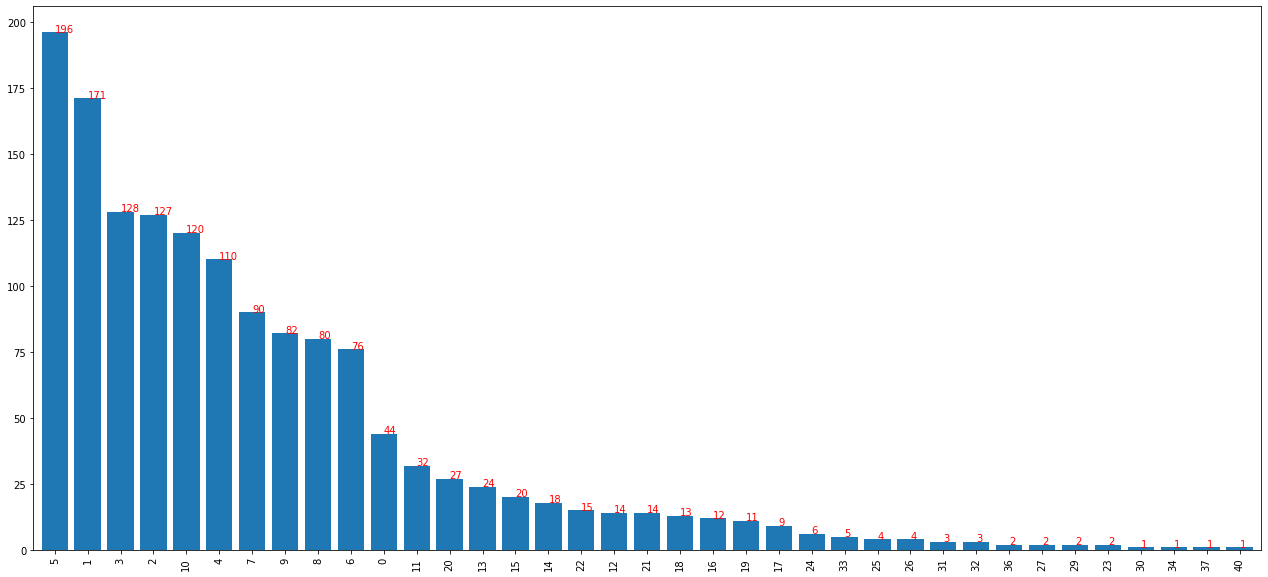

In [118]:
plt.figure(figsize=(22,10))
s = df['YearsAtCompany'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.YearsAtCompany + 0.2 , v.YearsAtCompany, color='red')
plt.show()

Observations:
    
    1.There are 196 employees with 5 years of experience in the same company , followed by 1 year,3 years.

**Column 33: YearsInCurrentRole**

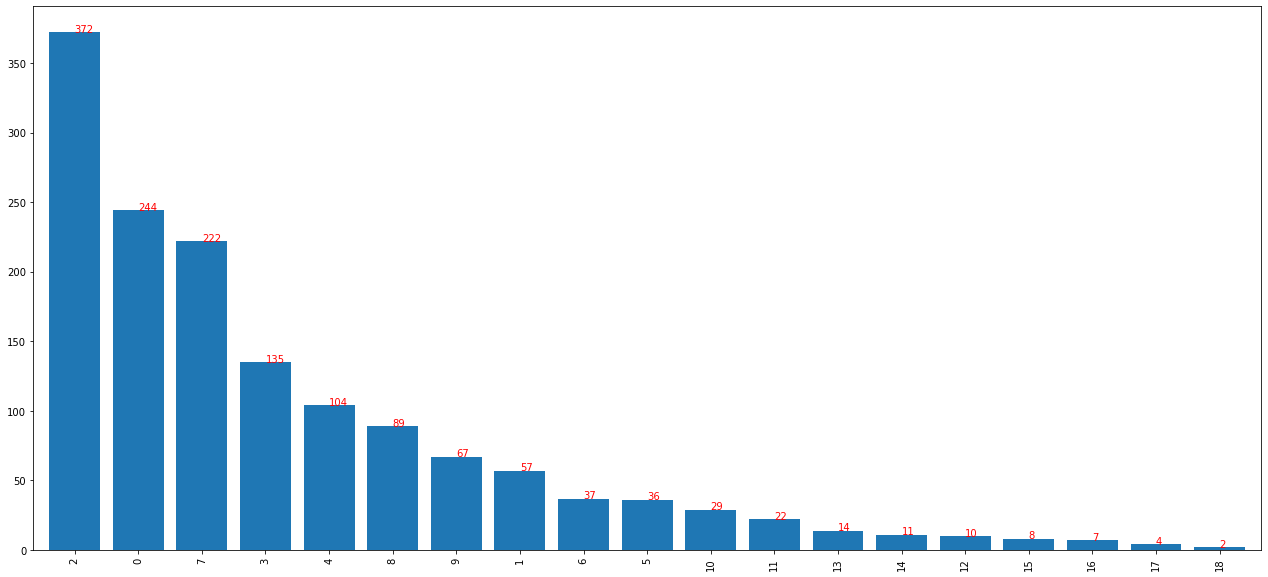

In [119]:
plt.figure(figsize=(22,10))
s = df['YearsInCurrentRole'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.YearsInCurrentRole + 0.2 , v.YearsInCurrentRole, color='red')
plt.show()

Observations:
    
    1.The range of this particular column is from 0 to 18, as number of years increases there is decrease employee number.

**Column 34: YearsSinceLastPromotion**

YearsSinceLastPromotion
count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64




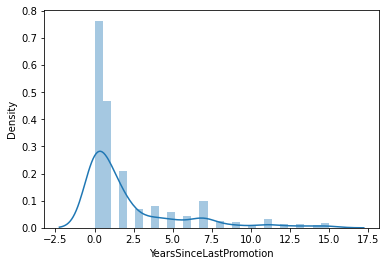

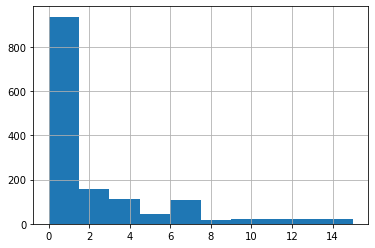

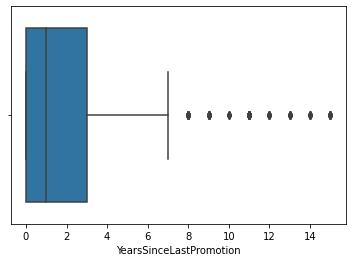

In [120]:
eda('YearsSinceLastPromotion')

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

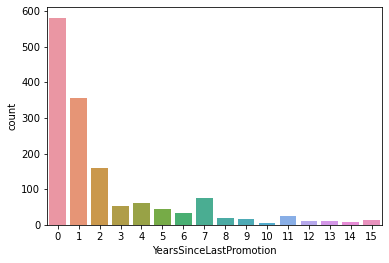

In [121]:
sns.countplot(df['YearsSinceLastPromotion'])

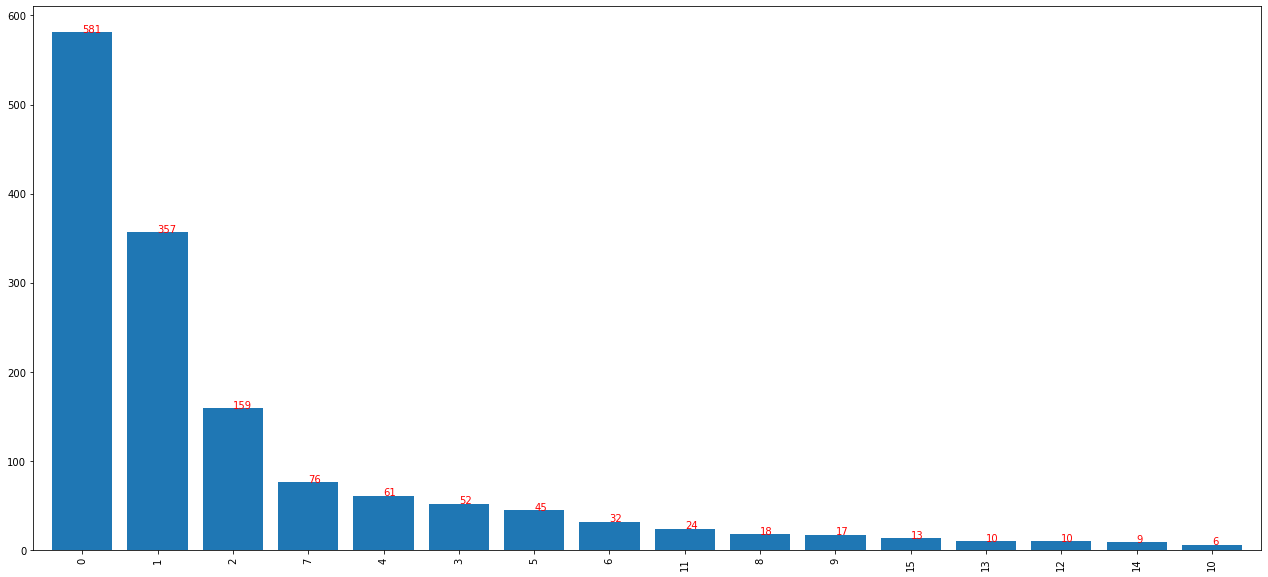

In [122]:
plt.figure(figsize=(22,10))
s = df['YearsSinceLastPromotion'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.YearsSinceLastPromotion + 0.2 , v.YearsSinceLastPromotion, color='red')
plt.show()

Observations:
    
    1.There are 581 members are there whos promotion is been done within a year.

**Column 35: YearsWithCurrManager**

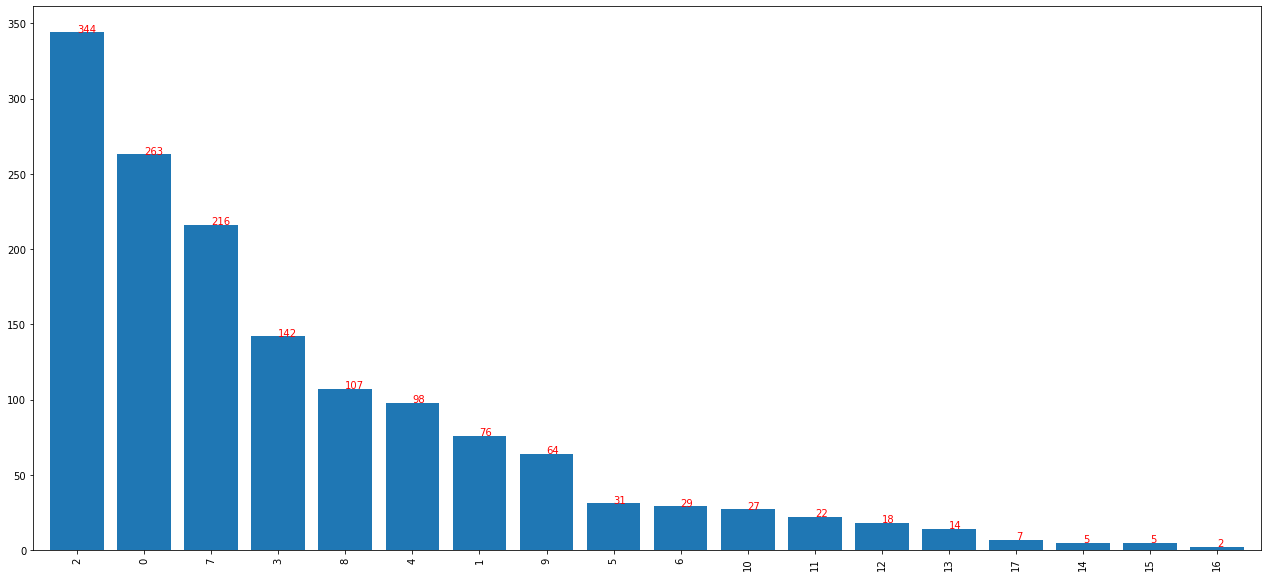

In [123]:
plt.figure(figsize=(22,10))
s = df['YearsWithCurrManager'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.YearsWithCurrManager + 0.2 , v.YearsWithCurrManager, color='red')
plt.show()

Observations:
    
    1.There are very few members who work constantly with the same manager.

# Multivariate analysis

In [129]:
corr_matrix=df.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

Observations:
    
    There are columns which are significantly correlated with the attrition which we have to analyse separately in bi variate analysis:
    1.Overtime
    2.Marital status
    3.Distance from the home
    4.Jobrole
    5.TotalWorking in years
    6.Job level
    7.Years in current role
    8.Monthly income
    9.age
    10.years with current manager        

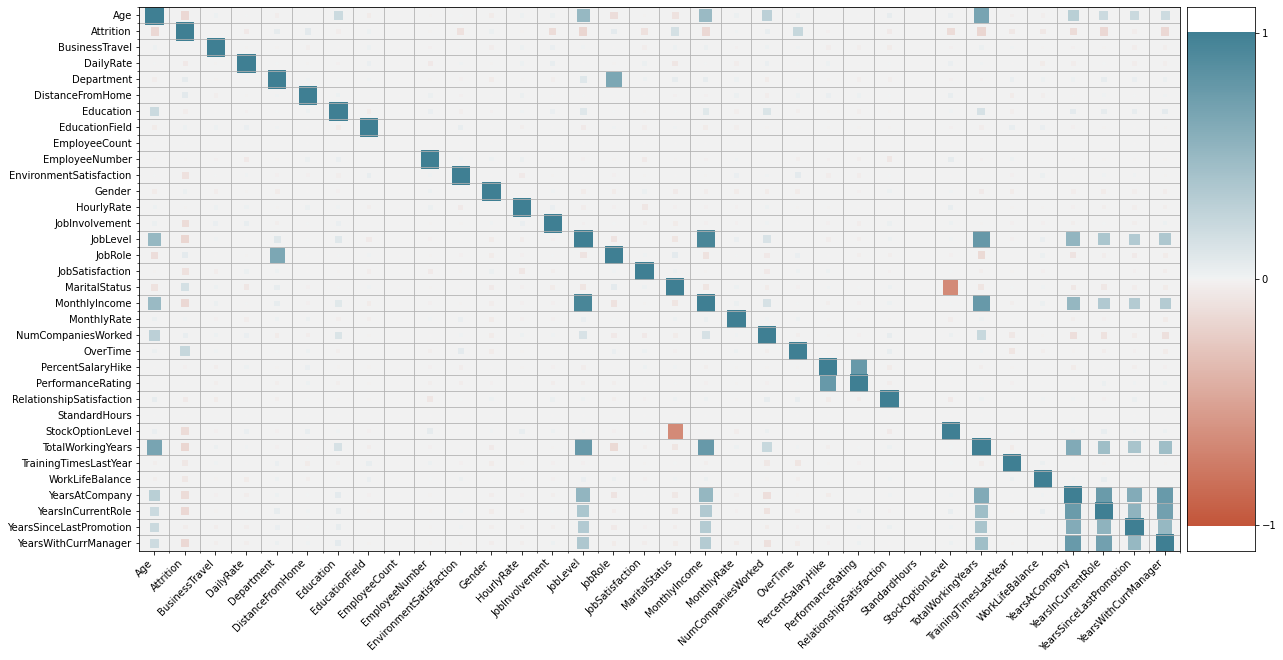

In [125]:
from heatmap import heatmap,corrplot
plt.figure(figsize=(20,10))
corrplot(df.corr(),size_scale=300)

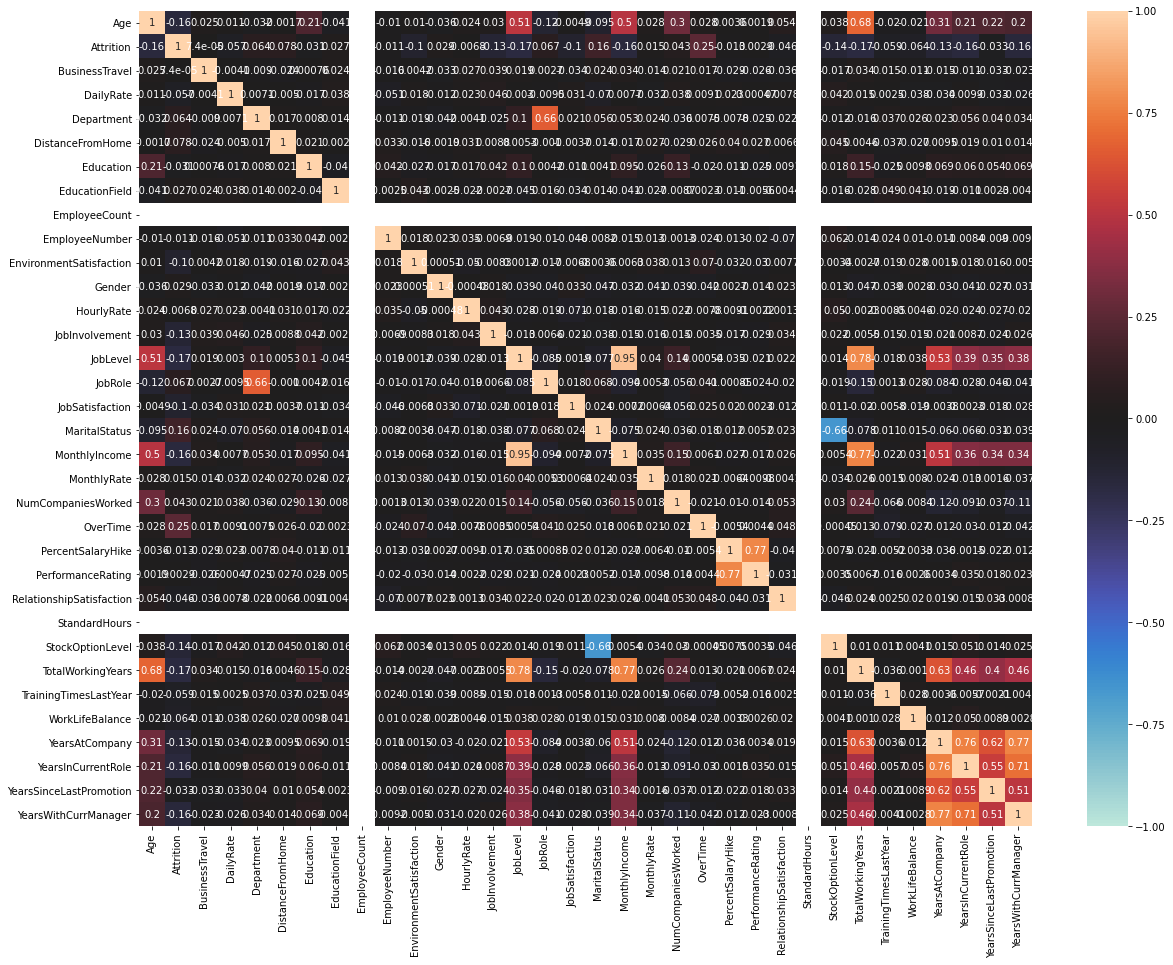

In [131]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    From the above plots we can infer that there are independent variables which shows significant correlation value with other variables which we should analyse in the bi variate analysis.
    1.Education vs Age
    2.Age vs Joblevel
    3.Age vs Monthly income
    4.Age vs Number of companies worked
    5.Age vs Total working in years
    6.Totall working in years vs Joblevel
    7.Marital status vs Stock option level
    8.Total working in years vs Monthly income
    9.Years with company vs Years in Current manager  

In [132]:
#lets carryout multivariate analysis through grouping

In [134]:
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [143]:
at=df.groupby('Attrition')

In [144]:
at_yes=at.get_group(1)

In [145]:
at_no=at.get_group(0)

In [146]:
at_yes.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1.0,1010.345992,2.464135,0.632911,65.573840,2.518987,1.637131,4.835443,2.468354,1.367089,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,0.584062,401.899519,0.571186,8.452525,1.008244,1.435520,0.0,580.750572,1.169791,0.483031,20.099958,0.773405,0.940594,2.579731,1.118058,0.716226,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,1.000000,408.000000,1.000000,3.000000,2.000000,1.000000,1.0,514.000000,1.000000,0.000000,50.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,2.000000,699.000000,1.000000,9.000000,3.000000,2.000000,1.0,1017.000000,3.000000,1.000000,66.000000,3.000000,1.000000,6.000000,3.000000,2.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,2.000000,1092.000000,2.000000,17.000000,4.000000,3.000000,1.0,1486.000000,4.000000,1.000000,84.000000,3.000000,2.000000,7.000000,3.000000,2.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,2.000000,1496.000000,2.000000,29.000000,5.000000,5.000000,1.0,2055.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [147]:
at_no.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1.0,1027.656123,2.771290,0.593674,65.952149,2.770479,2.145985,4.386050,2.778589,1.045418,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,0.680200,403.208379,0.517973,8.012633,1.027002,1.310442,0.0,606.217074,1.071132,0.491346,20.380754,0.692050,1.117933,2.432905,1.093277,0.721570,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,2.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,1.000000,477.000000,1.000000,2.000000,2.000000,1.000000,1.0,483.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,2.000000,817.000000,1.000000,7.000000,3.000000,2.000000,1.0,1022.000000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,2.000000,1176.000000,2.000000,13.000000,4.000000,3.000000,1.0,1574.000000,4.000000,1.000000,83.000000,3.000000,3.000000,7.000000,4.000000,2.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


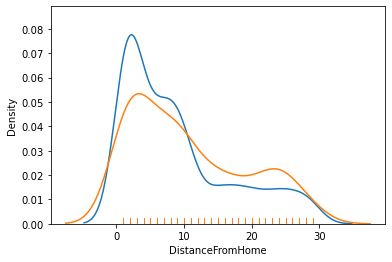

In [155]:
plt.plot(figsize=(10,8))
sns.distplot(at_no['DistanceFromHome'],hist=False,rug=True)
sns.distplot(at_yes['DistanceFromHome'],hist=False,rug=True)
plt.show()

Observations:
    
    Not much significant observations.

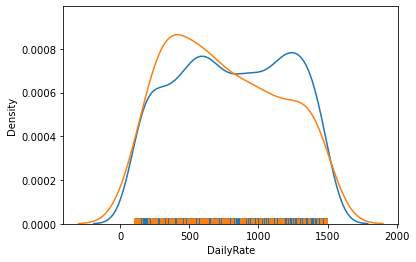

In [156]:
plt.plot(figsize=(10,8))
sns.distplot(at_no['DailyRate'],hist=False,rug=True)
sns.distplot(at_yes['DailyRate'],hist=False,rug=True)
plt.show()

Observations:
    
    1.Those people who have DailyRate between 0 and 750 are more likely for attrition.

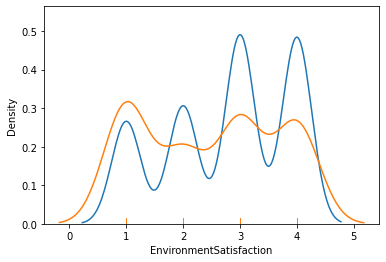

In [157]:
sns.distplot(at_no['EnvironmentSatisfaction'],hist=False,rug=True)
sns.distplot(at_yes['EnvironmentSatisfaction'],hist=False,rug=True)
plt.show()

Observations:
    
    1.Most of the people who will leave the job will have EnvironmentSatisfaction as 1.

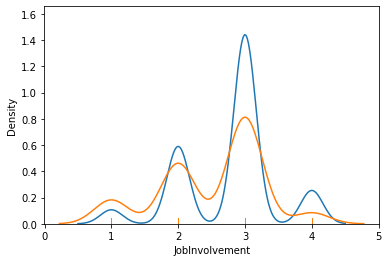

In [158]:
sns.distplot(at_no['JobInvolvement'],hist=False,rug=True)
sns.distplot(at_yes['JobInvolvement'],hist=False,rug=True)
plt.show()

Observations:
    
    1.Those people who have Jobinvolvement as 1 are more likey to leave.

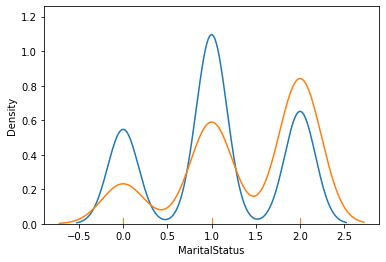

In [159]:
sns.distplot(at_no['MaritalStatus'],hist=False,rug=True)
sns.distplot(at_yes['MaritalStatus'],hist=False,rug=True)
plt.show()

In [160]:
label_MaritalStatus[2]

'Single'

Observations:
    
    1.Singles are more likey to leave the job.

# Bi variate analysis

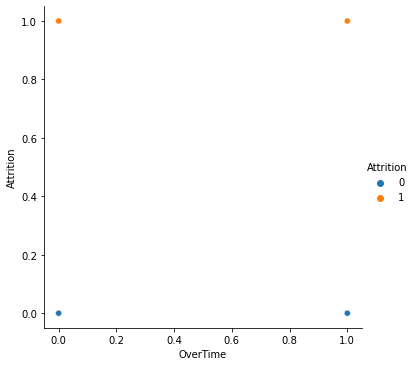

In [161]:
sns.relplot(x='OverTime',y='Attrition',data=df,hue='Attrition')

In [162]:
#we need to scratch the data in some other ways,

In [163]:
at_yes.shape

(237, 35)

In [171]:
df[(df.Attrition==1)&(df.OverTime==1)].count()

Age                         127
Attrition                   127
BusinessTravel              127
DailyRate                   127
Department                  127
DistanceFromHome            127
Education                   127
EducationField              127
EmployeeCount               127
EmployeeNumber              127
EnvironmentSatisfaction     127
Gender                      127
HourlyRate                  127
JobInvolvement              127
JobLevel                    127
JobRole                     127
JobSatisfaction             127
MaritalStatus               127
MonthlyIncome               127
MonthlyRate                 127
NumCompaniesWorked          127
Over18                      127
OverTime                    127
PercentSalaryHike           127
PerformanceRating           127
RelationshipSatisfaction    127
StandardHours               127
StockOptionLevel            127
TotalWorkingYears           127
TrainingTimesLastYear       127
WorkLifeBalance             127
YearsAtC

Observations:
    
    1.Out of the total people left from the comapny 53% belongs to overtime yes category.

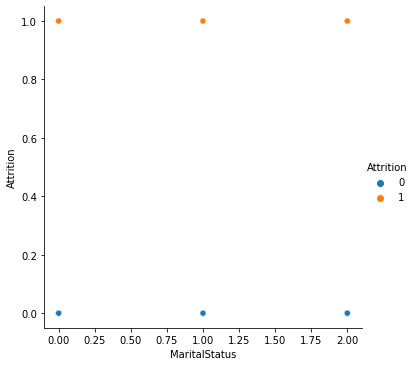

In [173]:
sns.relplot(x='MaritalStatus',y='Attrition',data=df,hue='Attrition')

In [175]:
df[(df.Attrition==1)&(df.MaritalStatus==0)].count()

Age                         33
Attrition                   33
BusinessTravel              33
DailyRate                   33
Department                  33
DistanceFromHome            33
Education                   33
EducationField              33
EmployeeCount               33
EmployeeNumber              33
EnvironmentSatisfaction     33
Gender                      33
HourlyRate                  33
JobInvolvement              33
JobLevel                    33
JobRole                     33
JobSatisfaction             33
MaritalStatus               33
MonthlyIncome               33
MonthlyRate                 33
NumCompaniesWorked          33
Over18                      33
OverTime                    33
PercentSalaryHike           33
PerformanceRating           33
RelationshipSatisfaction    33
StandardHours               33
StockOptionLevel            33
TotalWorkingYears           33
TrainingTimesLastYear       33
WorkLifeBalance             33
YearsAtCompany              33
YearsInC

In [176]:
df[(df.Attrition==1)&(df.MaritalStatus==1)].count()

Age                         84
Attrition                   84
BusinessTravel              84
DailyRate                   84
Department                  84
DistanceFromHome            84
Education                   84
EducationField              84
EmployeeCount               84
EmployeeNumber              84
EnvironmentSatisfaction     84
Gender                      84
HourlyRate                  84
JobInvolvement              84
JobLevel                    84
JobRole                     84
JobSatisfaction             84
MaritalStatus               84
MonthlyIncome               84
MonthlyRate                 84
NumCompaniesWorked          84
Over18                      84
OverTime                    84
PercentSalaryHike           84
PerformanceRating           84
RelationshipSatisfaction    84
StandardHours               84
StockOptionLevel            84
TotalWorkingYears           84
TrainingTimesLastYear       84
WorkLifeBalance             84
YearsAtCompany              84
YearsInC

In [177]:
df[(df.Attrition==1)&(df.MaritalStatus==2)].count()

Age                         120
Attrition                   120
BusinessTravel              120
DailyRate                   120
Department                  120
DistanceFromHome            120
Education                   120
EducationField              120
EmployeeCount               120
EmployeeNumber              120
EnvironmentSatisfaction     120
Gender                      120
HourlyRate                  120
JobInvolvement              120
JobLevel                    120
JobRole                     120
JobSatisfaction             120
MaritalStatus               120
MonthlyIncome               120
MonthlyRate                 120
NumCompaniesWorked          120
Over18                      120
OverTime                    120
PercentSalaryHike           120
PerformanceRating           120
RelationshipSatisfaction    120
StandardHours               120
StockOptionLevel            120
TotalWorkingYears           120
TrainingTimesLastYear       120
WorkLifeBalance             120
YearsAtC

In [179]:
label_MaritalStatus[0]

'Divorced'

In [180]:
label_MaritalStatus[1]

'Married'

In [181]:
label_MaritalStatus[2]

'Single'

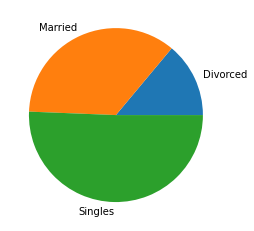

In [182]:
y = np.array([33, 84, 120])
mylabels = ["Divorced", "Married", "Singles"]

plt.pie(y, labels = mylabels)
plt.show() 

Observations:
    
    1.Most of the people who leave the jobs are singles then married once and last is divorced category.

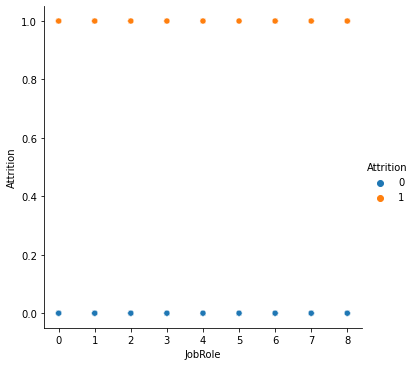

In [184]:
sns.relplot(x='JobRole',y='Attrition',data=df,hue='Attrition')

In [186]:
df[(df.Attrition==1)&(df.JobRole==0)].count()

Age                         9
Attrition                   9
BusinessTravel              9
DailyRate                   9
Department                  9
DistanceFromHome            9
Education                   9
EducationField              9
EmployeeCount               9
EmployeeNumber              9
EnvironmentSatisfaction     9
Gender                      9
HourlyRate                  9
JobInvolvement              9
JobLevel                    9
JobRole                     9
JobSatisfaction             9
MaritalStatus               9
MonthlyIncome               9
MonthlyRate                 9
NumCompaniesWorked          9
Over18                      9
OverTime                    9
PercentSalaryHike           9
PerformanceRating           9
RelationshipSatisfaction    9
StandardHours               9
StockOptionLevel            9
TotalWorkingYears           9
TrainingTimesLastYear       9
WorkLifeBalance             9
YearsAtCompany              9
YearsInCurrentRole          9
YearsSince

In [187]:
df[(df.Attrition==1)&(df.JobRole==1)].count()

Age                         12
Attrition                   12
BusinessTravel              12
DailyRate                   12
Department                  12
DistanceFromHome            12
Education                   12
EducationField              12
EmployeeCount               12
EmployeeNumber              12
EnvironmentSatisfaction     12
Gender                      12
HourlyRate                  12
JobInvolvement              12
JobLevel                    12
JobRole                     12
JobSatisfaction             12
MaritalStatus               12
MonthlyIncome               12
MonthlyRate                 12
NumCompaniesWorked          12
Over18                      12
OverTime                    12
PercentSalaryHike           12
PerformanceRating           12
RelationshipSatisfaction    12
StandardHours               12
StockOptionLevel            12
TotalWorkingYears           12
TrainingTimesLastYear       12
WorkLifeBalance             12
YearsAtCompany              12
YearsInC

In [205]:
df[(df.Attrition==1)&(df.JobRole==2)].count()

Age                         62
Attrition                   62
BusinessTravel              62
DailyRate                   62
Department                  62
DistanceFromHome            62
Education                   62
EducationField              62
EmployeeCount               62
EmployeeNumber              62
EnvironmentSatisfaction     62
Gender                      62
HourlyRate                  62
JobInvolvement              62
JobLevel                    62
JobRole                     62
JobSatisfaction             62
MaritalStatus               62
MonthlyIncome               62
MonthlyRate                 62
NumCompaniesWorked          62
Over18                      62
OverTime                    62
PercentSalaryHike           62
PerformanceRating           62
RelationshipSatisfaction    62
StandardHours               62
StockOptionLevel            62
TotalWorkingYears           62
TrainingTimesLastYear       62
WorkLifeBalance             62
YearsAtCompany              62
YearsInC

In [188]:
df[(df.Attrition==1)&(df.JobRole==3)].count()

Age                         5
Attrition                   5
BusinessTravel              5
DailyRate                   5
Department                  5
DistanceFromHome            5
Education                   5
EducationField              5
EmployeeCount               5
EmployeeNumber              5
EnvironmentSatisfaction     5
Gender                      5
HourlyRate                  5
JobInvolvement              5
JobLevel                    5
JobRole                     5
JobSatisfaction             5
MaritalStatus               5
MonthlyIncome               5
MonthlyRate                 5
NumCompaniesWorked          5
Over18                      5
OverTime                    5
PercentSalaryHike           5
PerformanceRating           5
RelationshipSatisfaction    5
StandardHours               5
StockOptionLevel            5
TotalWorkingYears           5
TrainingTimesLastYear       5
WorkLifeBalance             5
YearsAtCompany              5
YearsInCurrentRole          5
YearsSince

In [189]:
df[(df.Attrition==1)&(df.JobRole==4)].count()

Age                         10
Attrition                   10
BusinessTravel              10
DailyRate                   10
Department                  10
DistanceFromHome            10
Education                   10
EducationField              10
EmployeeCount               10
EmployeeNumber              10
EnvironmentSatisfaction     10
Gender                      10
HourlyRate                  10
JobInvolvement              10
JobLevel                    10
JobRole                     10
JobSatisfaction             10
MaritalStatus               10
MonthlyIncome               10
MonthlyRate                 10
NumCompaniesWorked          10
Over18                      10
OverTime                    10
PercentSalaryHike           10
PerformanceRating           10
RelationshipSatisfaction    10
StandardHours               10
StockOptionLevel            10
TotalWorkingYears           10
TrainingTimesLastYear       10
WorkLifeBalance             10
YearsAtCompany              10
YearsInC

In [190]:
df[(df.Attrition==1)&(df.JobRole==5)].count()

Age                         2
Attrition                   2
BusinessTravel              2
DailyRate                   2
Department                  2
DistanceFromHome            2
Education                   2
EducationField              2
EmployeeCount               2
EmployeeNumber              2
EnvironmentSatisfaction     2
Gender                      2
HourlyRate                  2
JobInvolvement              2
JobLevel                    2
JobRole                     2
JobSatisfaction             2
MaritalStatus               2
MonthlyIncome               2
MonthlyRate                 2
NumCompaniesWorked          2
Over18                      2
OverTime                    2
PercentSalaryHike           2
PerformanceRating           2
RelationshipSatisfaction    2
StandardHours               2
StockOptionLevel            2
TotalWorkingYears           2
TrainingTimesLastYear       2
WorkLifeBalance             2
YearsAtCompany              2
YearsInCurrentRole          2
YearsSince

In [191]:
df[(df.Attrition==1)&(df.JobRole==6)].count()

Age                         47
Attrition                   47
BusinessTravel              47
DailyRate                   47
Department                  47
DistanceFromHome            47
Education                   47
EducationField              47
EmployeeCount               47
EmployeeNumber              47
EnvironmentSatisfaction     47
Gender                      47
HourlyRate                  47
JobInvolvement              47
JobLevel                    47
JobRole                     47
JobSatisfaction             47
MaritalStatus               47
MonthlyIncome               47
MonthlyRate                 47
NumCompaniesWorked          47
Over18                      47
OverTime                    47
PercentSalaryHike           47
PerformanceRating           47
RelationshipSatisfaction    47
StandardHours               47
StockOptionLevel            47
TotalWorkingYears           47
TrainingTimesLastYear       47
WorkLifeBalance             47
YearsAtCompany              47
YearsInC

In [192]:
df[(df.Attrition==1)&(df.JobRole==7)].count()

Age                         57
Attrition                   57
BusinessTravel              57
DailyRate                   57
Department                  57
DistanceFromHome            57
Education                   57
EducationField              57
EmployeeCount               57
EmployeeNumber              57
EnvironmentSatisfaction     57
Gender                      57
HourlyRate                  57
JobInvolvement              57
JobLevel                    57
JobRole                     57
JobSatisfaction             57
MaritalStatus               57
MonthlyIncome               57
MonthlyRate                 57
NumCompaniesWorked          57
Over18                      57
OverTime                    57
PercentSalaryHike           57
PerformanceRating           57
RelationshipSatisfaction    57
StandardHours               57
StockOptionLevel            57
TotalWorkingYears           57
TrainingTimesLastYear       57
WorkLifeBalance             57
YearsAtCompany              57
YearsInC

In [193]:
df[(df.Attrition==1)&(df.JobRole==8)].count()

Age                         33
Attrition                   33
BusinessTravel              33
DailyRate                   33
Department                  33
DistanceFromHome            33
Education                   33
EducationField              33
EmployeeCount               33
EmployeeNumber              33
EnvironmentSatisfaction     33
Gender                      33
HourlyRate                  33
JobInvolvement              33
JobLevel                    33
JobRole                     33
JobSatisfaction             33
MaritalStatus               33
MonthlyIncome               33
MonthlyRate                 33
NumCompaniesWorked          33
Over18                      33
OverTime                    33
PercentSalaryHike           33
PerformanceRating           33
RelationshipSatisfaction    33
StandardHours               33
StockOptionLevel            33
TotalWorkingYears           33
TrainingTimesLastYear       33
WorkLifeBalance             33
YearsAtCompany              33
YearsInC

In [195]:
df[(df.JobRole==0)].count()

Age                         131
Attrition                   131
BusinessTravel              131
DailyRate                   131
Department                  131
DistanceFromHome            131
Education                   131
EducationField              131
EmployeeCount               131
EmployeeNumber              131
EnvironmentSatisfaction     131
Gender                      131
HourlyRate                  131
JobInvolvement              131
JobLevel                    131
JobRole                     131
JobSatisfaction             131
MaritalStatus               131
MonthlyIncome               131
MonthlyRate                 131
NumCompaniesWorked          131
Over18                      131
OverTime                    131
PercentSalaryHike           131
PerformanceRating           131
RelationshipSatisfaction    131
StandardHours               131
StockOptionLevel            131
TotalWorkingYears           131
TrainingTimesLastYear       131
WorkLifeBalance             131
YearsAtC

In [196]:
df[(df.JobRole==1)].count()

Age                         52
Attrition                   52
BusinessTravel              52
DailyRate                   52
Department                  52
DistanceFromHome            52
Education                   52
EducationField              52
EmployeeCount               52
EmployeeNumber              52
EnvironmentSatisfaction     52
Gender                      52
HourlyRate                  52
JobInvolvement              52
JobLevel                    52
JobRole                     52
JobSatisfaction             52
MaritalStatus               52
MonthlyIncome               52
MonthlyRate                 52
NumCompaniesWorked          52
Over18                      52
OverTime                    52
PercentSalaryHike           52
PerformanceRating           52
RelationshipSatisfaction    52
StandardHours               52
StockOptionLevel            52
TotalWorkingYears           52
TrainingTimesLastYear       52
WorkLifeBalance             52
YearsAtCompany              52
YearsInC

In [199]:
df[(df.JobRole==2)].count()

Age                         259
Attrition                   259
BusinessTravel              259
DailyRate                   259
Department                  259
DistanceFromHome            259
Education                   259
EducationField              259
EmployeeCount               259
EmployeeNumber              259
EnvironmentSatisfaction     259
Gender                      259
HourlyRate                  259
JobInvolvement              259
JobLevel                    259
JobRole                     259
JobSatisfaction             259
MaritalStatus               259
MonthlyIncome               259
MonthlyRate                 259
NumCompaniesWorked          259
Over18                      259
OverTime                    259
PercentSalaryHike           259
PerformanceRating           259
RelationshipSatisfaction    259
StandardHours               259
StockOptionLevel            259
TotalWorkingYears           259
TrainingTimesLastYear       259
WorkLifeBalance             259
YearsAtC

In [198]:
df[(df.JobRole==3)].count()

Age                         102
Attrition                   102
BusinessTravel              102
DailyRate                   102
Department                  102
DistanceFromHome            102
Education                   102
EducationField              102
EmployeeCount               102
EmployeeNumber              102
EnvironmentSatisfaction     102
Gender                      102
HourlyRate                  102
JobInvolvement              102
JobLevel                    102
JobRole                     102
JobSatisfaction             102
MaritalStatus               102
MonthlyIncome               102
MonthlyRate                 102
NumCompaniesWorked          102
Over18                      102
OverTime                    102
PercentSalaryHike           102
PerformanceRating           102
RelationshipSatisfaction    102
StandardHours               102
StockOptionLevel            102
TotalWorkingYears           102
TrainingTimesLastYear       102
WorkLifeBalance             102
YearsAtC

In [200]:
df[(df.JobRole==4)].count()

Age                         145
Attrition                   145
BusinessTravel              145
DailyRate                   145
Department                  145
DistanceFromHome            145
Education                   145
EducationField              145
EmployeeCount               145
EmployeeNumber              145
EnvironmentSatisfaction     145
Gender                      145
HourlyRate                  145
JobInvolvement              145
JobLevel                    145
JobRole                     145
JobSatisfaction             145
MaritalStatus               145
MonthlyIncome               145
MonthlyRate                 145
NumCompaniesWorked          145
Over18                      145
OverTime                    145
PercentSalaryHike           145
PerformanceRating           145
RelationshipSatisfaction    145
StandardHours               145
StockOptionLevel            145
TotalWorkingYears           145
TrainingTimesLastYear       145
WorkLifeBalance             145
YearsAtC

In [201]:
df[(df.JobRole==5)].count()

Age                         80
Attrition                   80
BusinessTravel              80
DailyRate                   80
Department                  80
DistanceFromHome            80
Education                   80
EducationField              80
EmployeeCount               80
EmployeeNumber              80
EnvironmentSatisfaction     80
Gender                      80
HourlyRate                  80
JobInvolvement              80
JobLevel                    80
JobRole                     80
JobSatisfaction             80
MaritalStatus               80
MonthlyIncome               80
MonthlyRate                 80
NumCompaniesWorked          80
Over18                      80
OverTime                    80
PercentSalaryHike           80
PerformanceRating           80
RelationshipSatisfaction    80
StandardHours               80
StockOptionLevel            80
TotalWorkingYears           80
TrainingTimesLastYear       80
WorkLifeBalance             80
YearsAtCompany              80
YearsInC

In [202]:
df[(df.JobRole==6)].count()

Age                         292
Attrition                   292
BusinessTravel              292
DailyRate                   292
Department                  292
DistanceFromHome            292
Education                   292
EducationField              292
EmployeeCount               292
EmployeeNumber              292
EnvironmentSatisfaction     292
Gender                      292
HourlyRate                  292
JobInvolvement              292
JobLevel                    292
JobRole                     292
JobSatisfaction             292
MaritalStatus               292
MonthlyIncome               292
MonthlyRate                 292
NumCompaniesWorked          292
Over18                      292
OverTime                    292
PercentSalaryHike           292
PerformanceRating           292
RelationshipSatisfaction    292
StandardHours               292
StockOptionLevel            292
TotalWorkingYears           292
TrainingTimesLastYear       292
WorkLifeBalance             292
YearsAtC

In [203]:
df[(df.JobRole==7)].count()

Age                         326
Attrition                   326
BusinessTravel              326
DailyRate                   326
Department                  326
DistanceFromHome            326
Education                   326
EducationField              326
EmployeeCount               326
EmployeeNumber              326
EnvironmentSatisfaction     326
Gender                      326
HourlyRate                  326
JobInvolvement              326
JobLevel                    326
JobRole                     326
JobSatisfaction             326
MaritalStatus               326
MonthlyIncome               326
MonthlyRate                 326
NumCompaniesWorked          326
Over18                      326
OverTime                    326
PercentSalaryHike           326
PerformanceRating           326
RelationshipSatisfaction    326
StandardHours               326
StockOptionLevel            326
TotalWorkingYears           326
TrainingTimesLastYear       326
WorkLifeBalance             326
YearsAtC

In [204]:
df[(df.JobRole==8)].count()

Age                         83
Attrition                   83
BusinessTravel              83
DailyRate                   83
Department                  83
DistanceFromHome            83
Education                   83
EducationField              83
EmployeeCount               83
EmployeeNumber              83
EnvironmentSatisfaction     83
Gender                      83
HourlyRate                  83
JobInvolvement              83
JobLevel                    83
JobRole                     83
JobSatisfaction             83
MaritalStatus               83
MonthlyIncome               83
MonthlyRate                 83
NumCompaniesWorked          83
Over18                      83
OverTime                    83
PercentSalaryHike           83
PerformanceRating           83
RelationshipSatisfaction    83
StandardHours               83
StockOptionLevel            83
TotalWorkingYears           83
TrainingTimesLastYear       83
WorkLifeBalance             83
YearsAtCompany              83
YearsInC

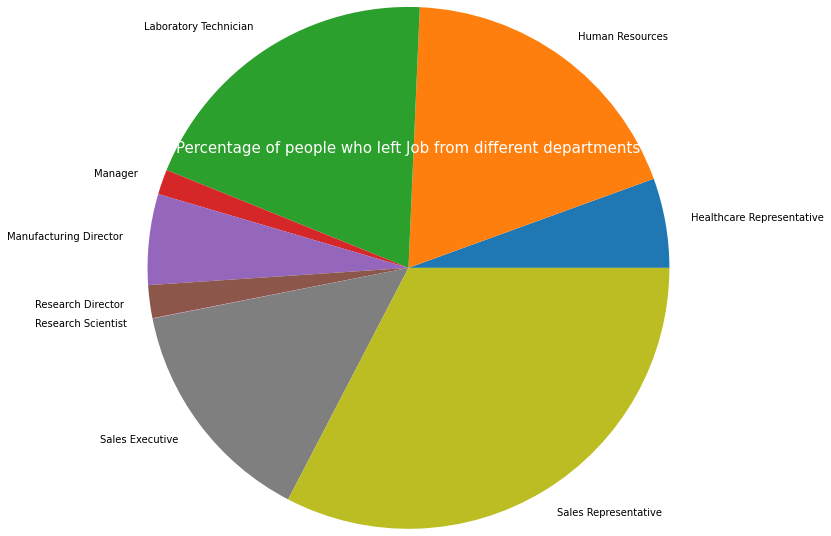

In [252]:
y = np.array([6.8,23,24,1.9,6.89,2.5,0.023,17.48,40])
mylabels = ["Healthcare Representative", "Human Resources", "Laboratory Technician","Manager","Manufacturing Director","Research Director","Research Scientist","Sales Executive","Sales Representative"]
plt.pie(y, labels = mylabels,radius=3)
plt.title('Percentage of people who left Job from different departments',fontsize = 15,color='white')
plt.show() 

In [223]:
label_JobRole[8]

'Sales Representative'

Observations: 
    
    1.We can see that sales representative,sales executive,human resource, laboratory technician are more likely to leave the job.

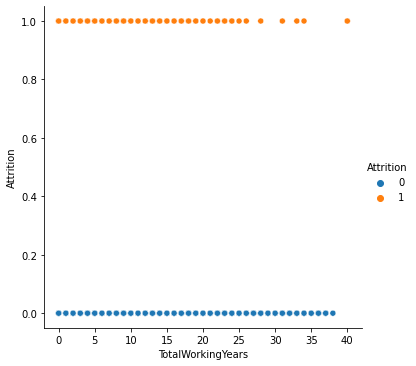

In [245]:
sns.relplot(x='TotalWorkingYears',y='Attrition',data=df,hue='Attrition')

Observations:
    
    1.People who have more total working in years are less likey to leave.

In [227]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [229]:
df[(df.Attrition==1)&(df.JobLevel==1)].count()

Age                         143
Attrition                   143
BusinessTravel              143
DailyRate                   143
Department                  143
DistanceFromHome            143
Education                   143
EducationField              143
EmployeeCount               143
EmployeeNumber              143
EnvironmentSatisfaction     143
Gender                      143
HourlyRate                  143
JobInvolvement              143
JobLevel                    143
JobRole                     143
JobSatisfaction             143
MaritalStatus               143
MonthlyIncome               143
MonthlyRate                 143
NumCompaniesWorked          143
Over18                      143
OverTime                    143
PercentSalaryHike           143
PerformanceRating           143
RelationshipSatisfaction    143
StandardHours               143
StockOptionLevel            143
TotalWorkingYears           143
TrainingTimesLastYear       143
WorkLifeBalance             143
YearsAtC

In [230]:
df[(df.Attrition==1)&(df.JobLevel==2)].count()

Age                         52
Attrition                   52
BusinessTravel              52
DailyRate                   52
Department                  52
DistanceFromHome            52
Education                   52
EducationField              52
EmployeeCount               52
EmployeeNumber              52
EnvironmentSatisfaction     52
Gender                      52
HourlyRate                  52
JobInvolvement              52
JobLevel                    52
JobRole                     52
JobSatisfaction             52
MaritalStatus               52
MonthlyIncome               52
MonthlyRate                 52
NumCompaniesWorked          52
Over18                      52
OverTime                    52
PercentSalaryHike           52
PerformanceRating           52
RelationshipSatisfaction    52
StandardHours               52
StockOptionLevel            52
TotalWorkingYears           52
TrainingTimesLastYear       52
WorkLifeBalance             52
YearsAtCompany              52
YearsInC

In [231]:
df[(df.Attrition==1)&(df.JobLevel==3)].count()

Age                         32
Attrition                   32
BusinessTravel              32
DailyRate                   32
Department                  32
DistanceFromHome            32
Education                   32
EducationField              32
EmployeeCount               32
EmployeeNumber              32
EnvironmentSatisfaction     32
Gender                      32
HourlyRate                  32
JobInvolvement              32
JobLevel                    32
JobRole                     32
JobSatisfaction             32
MaritalStatus               32
MonthlyIncome               32
MonthlyRate                 32
NumCompaniesWorked          32
Over18                      32
OverTime                    32
PercentSalaryHike           32
PerformanceRating           32
RelationshipSatisfaction    32
StandardHours               32
StockOptionLevel            32
TotalWorkingYears           32
TrainingTimesLastYear       32
WorkLifeBalance             32
YearsAtCompany              32
YearsInC

In [232]:
df[(df.Attrition==1)&(df.JobLevel==4)].count()

Age                         5
Attrition                   5
BusinessTravel              5
DailyRate                   5
Department                  5
DistanceFromHome            5
Education                   5
EducationField              5
EmployeeCount               5
EmployeeNumber              5
EnvironmentSatisfaction     5
Gender                      5
HourlyRate                  5
JobInvolvement              5
JobLevel                    5
JobRole                     5
JobSatisfaction             5
MaritalStatus               5
MonthlyIncome               5
MonthlyRate                 5
NumCompaniesWorked          5
Over18                      5
OverTime                    5
PercentSalaryHike           5
PerformanceRating           5
RelationshipSatisfaction    5
StandardHours               5
StockOptionLevel            5
TotalWorkingYears           5
TrainingTimesLastYear       5
WorkLifeBalance             5
YearsAtCompany              5
YearsInCurrentRole          5
YearsSince

In [233]:
df[(df.Attrition==1)&(df.JobLevel==5)].count()

Age                         5
Attrition                   5
BusinessTravel              5
DailyRate                   5
Department                  5
DistanceFromHome            5
Education                   5
EducationField              5
EmployeeCount               5
EmployeeNumber              5
EnvironmentSatisfaction     5
Gender                      5
HourlyRate                  5
JobInvolvement              5
JobLevel                    5
JobRole                     5
JobSatisfaction             5
MaritalStatus               5
MonthlyIncome               5
MonthlyRate                 5
NumCompaniesWorked          5
Over18                      5
OverTime                    5
PercentSalaryHike           5
PerformanceRating           5
RelationshipSatisfaction    5
StandardHours               5
StockOptionLevel            5
TotalWorkingYears           5
TrainingTimesLastYear       5
WorkLifeBalance             5
YearsAtCompany              5
YearsInCurrentRole          5
YearsSince

In [242]:
df[(df.JobLevel==5)].count()

Age                         69
Attrition                   69
BusinessTravel              69
DailyRate                   69
Department                  69
DistanceFromHome            69
Education                   69
EducationField              69
EmployeeCount               69
EmployeeNumber              69
EnvironmentSatisfaction     69
Gender                      69
HourlyRate                  69
JobInvolvement              69
JobLevel                    69
JobRole                     69
JobSatisfaction             69
MaritalStatus               69
MonthlyIncome               69
MonthlyRate                 69
NumCompaniesWorked          69
Over18                      69
OverTime                    69
PercentSalaryHike           69
PerformanceRating           69
RelationshipSatisfaction    69
StandardHours               69
StockOptionLevel            69
TotalWorkingYears           69
TrainingTimesLastYear       69
WorkLifeBalance             69
YearsAtCompany              69
YearsInC

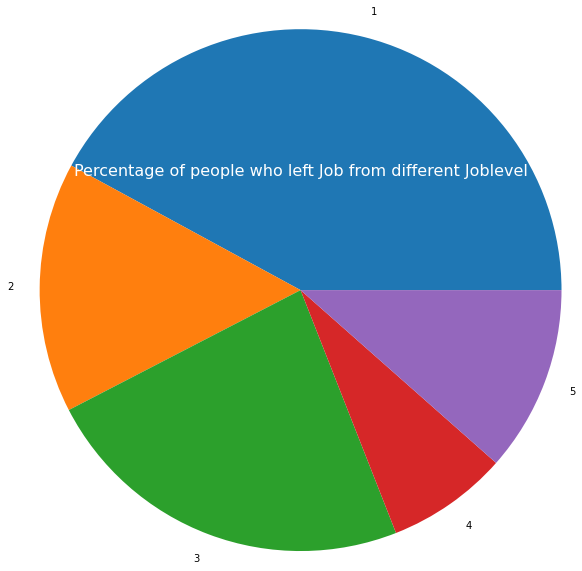

In [250]:
y = np.array([26.3,9.7,14.6,4.7,7.2])
mylabels = ['1','2','3','4','5']
plt.pie(y, labels = mylabels,radius=3)
plt.title('Percentage of people who left Job from different Joblevel',fontsize = 16,color='white')
plt.show() 

Observations:
    
    1.Joblevel 1 and 3 are more likely to leave the job followed by 2.

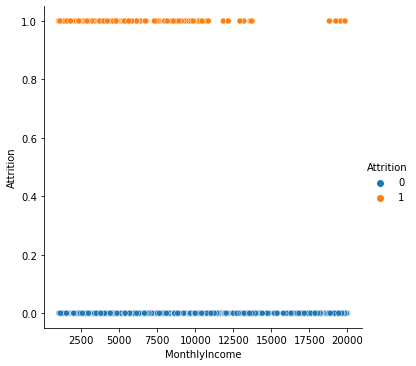

In [257]:
sns.relplot(x='MonthlyIncome',y='Attrition',data=df,hue='Attrition')

Observations:
    
    1.The employees who will get monthly income in the range 14k to 19k are less likely to leave the job.

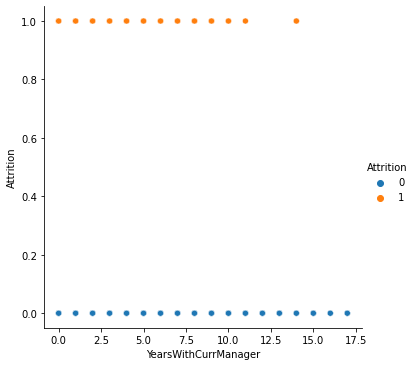

In [258]:
sns.relplot(x='YearsWithCurrManager',y='Attrition',data=df,hue='Attrition')

Observations:
    
    1.If one is working with same manager for more than 11 years that person is less likely to leave.

In [260]:
df['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [262]:
df[(df.Attrition==1)&(df.Gender==1)].count()

Age                         150
Attrition                   150
BusinessTravel              150
DailyRate                   150
Department                  150
DistanceFromHome            150
Education                   150
EducationField              150
EmployeeCount               150
EmployeeNumber              150
EnvironmentSatisfaction     150
Gender                      150
HourlyRate                  150
JobInvolvement              150
JobLevel                    150
JobRole                     150
JobSatisfaction             150
MaritalStatus               150
MonthlyIncome               150
MonthlyRate                 150
NumCompaniesWorked          150
Over18                      150
OverTime                    150
PercentSalaryHike           150
PerformanceRating           150
RelationshipSatisfaction    150
StandardHours               150
StockOptionLevel            150
TotalWorkingYears           150
TrainingTimesLastYear       150
WorkLifeBalance             150
YearsAtC

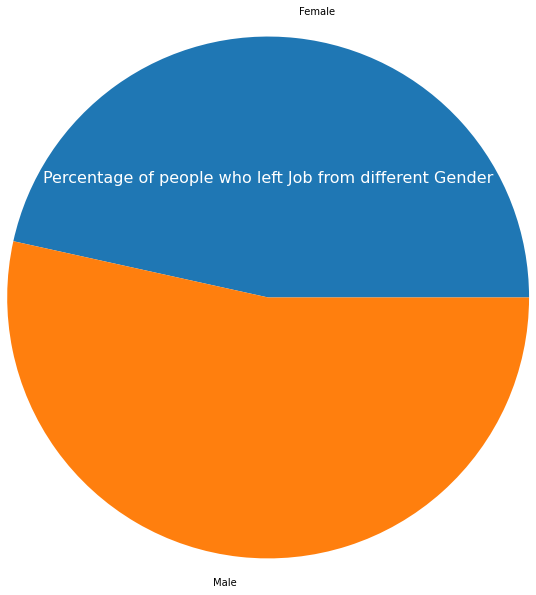

In [263]:
y = np.array([14.8,17])
mylabels = ['Female','Male']
plt.pie(y, labels = mylabels,radius=3)
plt.title('Percentage of people who left Job from different Gender',fontsize = 16,color='white')
plt.show() 

Observations:
    
    1.Even though both wont differ much but mens are more likly to leave the job compared to woman.

# Prescription from EDA

**Those people who have DailyRate between 0 and 750 are more likely yes for attrition
Most of the people who will leave the job will have EnvironmentSatisfaction as 1.
Those people who have Jobinvolvement as 1 are more likey to leave.
Singles are more likey to leave the job
Out of the total people left from the comapny 53% belongs to overtime yes category.
Most of the people who leave the jobs are singles then married once and last is divorced category.
We can see that sales representative,sales executive,human resource, laboratory technician are more likely to leave the job
Joblevel 1 and 3 are more likely to leave the job followed by 2.
If one is working with same manager for more than 11 years that person is less likely to leave.
Mens are more likly to leave the job compared to woman.**

# Data Cleaning

In [264]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [273]:
df1=df.drop(['StandardHours','Over18','EmployeeNumber','EmployeeCount'],axis=1)

In [274]:
df1.shape

(1470, 31)

# Removal of the outliers

# Removal of outliers by Zscore method

In [276]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
df2=df1[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df1.shape[0]-df2.shape[0])/df1.shape[0])

percentage of loss of data by zscore is : 0.05646258503401361


Observations:
    
    Since the data loss is less than 7% its ok to proceed further.

# splitting the variables.

In [278]:
xo=df2.drop('Attrition',axis=1)
yo=df2['Attrition']

# Removal of skewness

In [279]:
xo.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

Observation:
    
    1.We have to reduce the skewness of DistanceFromHome,MonthlyIncome
    2.Not much skewness because most of the columns are categorical.

In [281]:
xo['DistanceFromHome']=np.sqrt(xo['DistanceFromHome'])

In [286]:
xo['MonthlyIncome']=np.cbrt(xo['MonthlyIncome'])

# Using the over sampling techniques for class imbalance

In [290]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(xo,yo)
x_smote,y_smote=SM.fit_sample(xo,yo)

In [293]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.735
classification report is
              precision    recall  f1-score   support

           0       0.77      0.68      0.73       273
           1       0.70      0.79      0.74       260

    accuracy                           0.74       533
   macro avg       0.74      0.74      0.74       533
weighted avg       0.74      0.74      0.73       533

confusion matrix is
[[187  86]
 [ 55 205]]




In [292]:
#without oversampling accuracy
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.23,random_state=45)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.862
classification report is
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       274
           1       0.60      0.13      0.21        46

    accuracy                           0.86       320
   macro avg       0.74      0.56      0.57       320
weighted avg       0.83      0.86      0.82       320

confusion matrix is
[[270   4]
 [ 40   6]]




Observations:
    
    1.We can clearly see that oversampling is not usefull as it wont provide either good accuracy or f1 score.

# Checking the accuracy through standard scaling

In [295]:
from sklearn.preprocessing import StandardScaler

In [296]:
scale=StandardScaler()

In [297]:
xos=scale.fit_transform(xo)

In [298]:
x_train,x_test,y_train,y_test=train_test_split(xos,yo,test_size=0.23,random_state=45)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.891
classification report is
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       274
           1       0.72      0.39      0.51        46

    accuracy                           0.89       320
   macro avg       0.81      0.68      0.72       320
weighted avg       0.88      0.89      0.88       320

confusion matrix is
[[267   7]
 [ 28  18]]




Observations:
    
    1.We got a postive result here, we can use xos, and yo datasets further.

# Building the model

In [294]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [299]:
#Finding the best random state
#Finding the maximum accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(xos,yo,test_size=0.23,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.915625 on random state 109


In [300]:
x_train,x_test,y_train,y_test=train_test_split(xos,yo,test_size=0.23,random_state=109)

In [301]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.916
classification report is
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       281
           1       0.77      0.44      0.56        39

    accuracy                           0.92       320
   macro avg       0.85      0.71      0.76       320
weighted avg       0.91      0.92      0.91       320

confusion matrix is
[[276   5]
 [ 22  17]]




In [302]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.8
classification report is
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       281
           1       0.34      0.67      0.45        39

    accuracy                           0.80       320
   macro avg       0.64      0.74      0.66       320
weighted avg       0.87      0.80      0.83       320

confusion matrix is
[[230  51]
 [ 13  26]]




In [303]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.884
classification report is
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       281
           1       0.58      0.18      0.27        39

    accuracy                           0.88       320
   macro avg       0.74      0.58      0.61       320
weighted avg       0.86      0.88      0.86       320

confusion matrix is
[[276   5]
 [ 32   7]]




In [304]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.822
classification report is
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       281
           1       0.31      0.38      0.34        39

    accuracy                           0.82       320
   macro avg       0.61      0.63      0.62       320
weighted avg       0.84      0.82      0.83       320

confusion matrix is
[[248  33]
 [ 24  15]]




In [305]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.878
classification report is
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       281
           1       0.50      0.10      0.17        39

    accuracy                           0.88       320
   macro avg       0.69      0.54      0.55       320
weighted avg       0.84      0.88      0.84       320

confusion matrix is
[[277   4]
 [ 35   4]]




In [306]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.894
classification report is
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       281
           1       0.59      0.44      0.50        39

    accuracy                           0.89       320
   macro avg       0.76      0.70      0.72       320
weighted avg       0.88      0.89      0.89       320

confusion matrix is
[[269  12]
 [ 22  17]]




In [307]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.884
classification report is
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       281
           1       0.58      0.18      0.27        39

    accuracy                           0.88       320
   macro avg       0.74      0.58      0.61       320
weighted avg       0.86      0.88      0.86       320

confusion matrix is
[[276   5]
 [ 32   7]]




# Cross validation score

In [308]:
#cross val score for lg
score=cross_val_score(lg,xos,yo,cv=5)
print(lg,'score is:')
print(round((score.mean()),3))
print('\n')

LogisticRegression() score is:
0.872




In [309]:
#cross val score for gnb
score=cross_val_score(gnb,xos,yo,cv=5)
print(gnb,'score is:')
print(round((score.mean()),3))
print('\n')

GaussianNB() score is:
0.781




In [310]:
#cross val score for svc
score=cross_val_score(svc,xos,yo,cv=5)
print(svc,'score is:')
print(round((score.mean()),3))
print('\n')

SVC() score is:
0.86




In [311]:
#cross val score for dtc
score=cross_val_score(dtc,xos,yo,cv=5)
print(dtc,'score is:')
print(round((score.mean()),3))
print('\n')

DecisionTreeClassifier() score is:
0.779




In [312]:
#cross val score for knn
score=cross_val_score(knn,xos,yo,cv=5)
print(knn,'score is:')
print(round((score.mean()),3))
print('\n')

KNeighborsClassifier() score is:
0.845




In [313]:
#cross val score for add
score=cross_val_score(add,xos,yo,cv=5)
print(add,'score is:')
print(round((score.mean()),3))
print('\n')

AdaBoostClassifier() score is:
0.867




In [314]:
#cross val score for rf
score=cross_val_score(rf,xos,yo,cv=5)
print(rf,'score is:')
print(round((score.mean()),3))
print('\n')

RandomForestClassifier() score is:
0.857




# Finding the best model

Observations:
    
    The difference between accuracy score and cross validation score is as follows:
    1.LogisticRegression=0.044
    2.GaussianNB()      =0.019
    3.SVC               =0.024
    4.dtc               =0.043
    5.KNN               =0.033
    6.AdaBoost          =0.027
    7.RandomForest      =0.027
    
    Almost all the models have same difference,their difference wont differ much,I will choose LogisticRegression as best model because its not only good at accuracy, it has got good f1 score for both the categories compared to all the models which is a vital requirement for the imbalanced dataset.

# Hyper parameter tuning

In [315]:
grid_param={
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

gd_sr=GridSearchCV(estimator=lg,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(xos,yo)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'penalty': 'l2', 'solver': 'newton-cg'}
0.8716645456198219


In [316]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.916
classification report is
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       281
           1       0.77      0.44      0.56        39

    accuracy                           0.92       320
   macro avg       0.85      0.71      0.76       320
weighted avg       0.91      0.92      0.91       320

confusion matrix is
[[276   5]
 [ 22  17]]




Observations:
    
    1.The highest accuracy score is 0.916
    2.The best f1 score is 0.95 for attrition no and 0.56 for attrition yes.

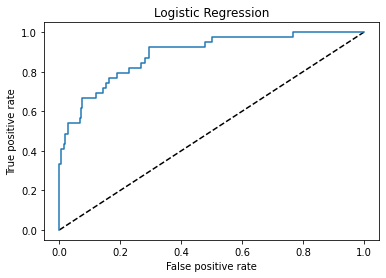

0.7090519207956929

In [317]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

Observations:
    
    Since auc_score falls in the range 0.5 to 1 so its the best model.

# Saving the model

In [318]:
import joblib
joblib.dump(lg,'HR Analytics.obj')

['HR Analytics.obj']